# Muay thai with OpenCV & Mediapipe

## Install fastdtw library

In [1]:
!pip install fastdtw

## Import library

In [1]:
#Standard library
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

#Calculate dynamic time warpping
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

## Setting mediapipe

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

## Example of check node per 10 threshold

In [5]:
cap = cv2.VideoCapture('muay_thai/new/1/1.MOV')
frameTime = 1
threshold = 0

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1920, 1080))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)
            
            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            #cv2.imshow('Mediapipe Feed', img)
            
            if threshold % 10 == 0:
                cv2.imshow('Mediapipe Feed', img)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break
        
    cap.release()
    cv2.destroyAllWindows()

## Read files to collect coordinate in csv

In [66]:
clip_df = pd.DataFrame()

columns = ['clip_name', 'threshold']
'''
bodies = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']
'''

for i in range(33):
    columns.append(('{}_x').format(i))
    columns.append(('{}_y').format(i))
    columns.append(('{}_z').format(i))
    
print(len(columns))

101


In [67]:
curr_data = []
for clip_round in range(1, 36):
    cap = cv2.VideoCapture('../video/train_clip/13/{}.MOV'.format(clip_round))
    frameTime = 1
    threshold = 0
    diff = 4

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            threshold += 1

            showed, frame = cap.read()
            if showed:
                frame = cv2.resize(frame, (1920, 1080))

                img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img.flags.writeable = False

                results = holistic.process(img)

                try:
                    landmarks = results.pose_landmarks.landmark
                except:
                    pass

                img.flags.writeable = True
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                #cv2.imshow('Mediapipe Feed', img)

                if threshold % diff == 0:
                    cv2.imshow('Mediapipe Feed', img)
                    curr_data = []
                    curr_data.append('13_{}'.format(clip_round))
                    curr_data.append(threshold)
                    for j in range(0, 33):
                        curr_data.append(landmarks[j].x)
                        curr_data.append(landmarks[j].y)
                        curr_data.append(landmarks[j].z)
                    clip_df = clip_df.append(pd.DataFrame([curr_data], columns=columns), ignore_index=True)

                if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                    break
            else:
                break

        cap.release()
        cv2.destroyAllWindows()

In [19]:
#clip_df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [23]:
#clip_df.reset_index(drop=True, inplace=True)

In [68]:
clip_df.head(60)

clip_name  threshold       0_x       0_y       0_z       1_x       1_y  \
0       13_1          4  0.483073  0.267570 -0.160818  0.488414  0.255846   
1       13_1          8  0.481735  0.268568 -0.162833  0.486960  0.256857   
2       13_1         12  0.480401  0.269997 -0.172104  0.485391  0.257863   
3       13_1         16  0.479870  0.271257 -0.175288  0.484801  0.258582   
4       13_1         20  0.476521  0.278326 -0.153319  0.479919  0.266635   
5       13_1         24  0.456259  0.344345 -0.115523  0.460014  0.329982   
6       13_1         28  0.448798  0.395028 -0.097799  0.451471  0.380157   
7       13_1         32  0.460650  0.377007 -0.083336  0.463625  0.363349   
8       13_1         36  0.505462  0.298192 -0.169089  0.507401  0.286558   
9       13_1         40  0.533807  0.293210 -0.175679  0.533105  0.282297   
10      13_1         44  0.537454  0.287350 -0.171365  0.538736  0.277427   
11      13_1         48  0.510835  0.272625 -0.117573  0.517323  0.263157   
12      13_1         52  0.485343  0.272826 -0.158073  0.490576  0.260839   
13      13_1         56  0.471808  0.271953 -0.125668  0.476446  0.258544   
14      13_1         60  0.474515  0.272709 -0.135013  0.479847  0.259957   
15      13_1         64  0.488996  0.273237 -0.153613  0.494996  0.260859   
16      13_1         68  0.496547  0.270747 -0.170020  0.502708  0.257959   
17      13_1         72  0.495763  0.268818 -0.161923  0.501872  0.257247   
18      13_1         76  0.489751  0.268139 -0.136026  0.495569  0.256775   
19      13_1         80  0.489131  0.266315 -0.140505  0.495092  0.255430   
20      13_2          4  0.478227  0.272514 -0.161479  0.482881  0.259540   
21      13_2          8  0.477032  0.275806 -0.165693  0.480661  0.262298   
22      13_2         12  0.471246  0.279076 -0.182298  0.474543  0.266611   
23      13_2         16  0.456143  0.308766 -0.095222  0.459005  0.295316   
24      13_2         20  0.446680  0.379975 -0.061346  0.447660  0.365140   
25      13_2         24  0.449920  0.388202 -0.109225  0.449759  0.374419   
26      13_2         28  0.491696  0.317367 -0.149203  0.493344  0.303406   
27      13_2         32  0.526164  0.296524 -0.174690  0.524581  0.285120   
28      13_2         36  0.535737  0.295887 -0.186520  0.535615  0.284692   
29      13_2         40  0.528401  0.286385 -0.139047  0.528473  0.273875   
30      13_2         44  0.495948  0.281678 -0.170519  0.499286  0.269876   
31      13_2         48  0.477619  0.278840 -0.144867  0.481036  0.266523   
32      13_2         52  0.483063  0.278324 -0.172566  0.488543  0.266750   
33      13_2         56  0.501661  0.275922 -0.180311  0.507285  0.263971   
34      13_2         60  0.508696  0.268825 -0.174397  0.514569  0.256693   
35      13_2         64  0.503107  0.266799 -0.170842  0.509187  0.255412   
36      13_2         68  0.491607  0.264926 -0.142893  0.496214  0.254068   
37      13_3          4  0.490551  0.264686 -0.170309  0.495889  0.254351   
38      13_3          8  0.490100  0.266071 -0.170943  0.495396  0.254732   
39      13_3         12  0.488333  0.270570 -0.179113  0.493137  0.258190   
40      13_3         16  0.483387  0.276022 -0.172405  0.486400  0.263381   
41      13_3         20  0.470212  0.305817 -0.067825  0.473158  0.292858   
42      13_3         24  0.457759  0.353821 -0.085908  0.460295  0.340189   
43      13_3         28  0.468705  0.360875 -0.128650  0.472061  0.345697   
44      13_3         32  0.512439  0.321552 -0.161717  0.514659  0.308001   
45      13_3         36  0.548136  0.313079 -0.116761  0.546798  0.301525   
46      13_3         40  0.560186  0.315450 -0.098242  0.559285  0.303594   
47      13_3         44  0.547182  0.295333 -0.159287  0.551095  0.282122   
48      13_3         48  0.513921  0.278641 -0.135403  0.518276  0.265963   
49      13_3         52  0.485777  0.274289 -0.167340  0.489392  0.261875   
50      13_3         56  0.474922  0.271030 -0.146348  0.480473  0.259178   

In [69]:
file_name = '13.csv'
clip_df.to_csv('../video/train_csv/{}'.format(file_name))

## Plotting threshold graph

In [65]:
cap = cv2.VideoCapture('../video/train_clip/13/31.MOV')
frameTime = 1
threshold = 0
results_list = []
diff = 4

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1920, 1080))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)

            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            #cv2.imshow('Mediapipe Feed', img)

            if threshold % diff == 0:
                cv2.imshow('Mediapipe Feed', img)
                results_list.append(results)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

### 3D graph view

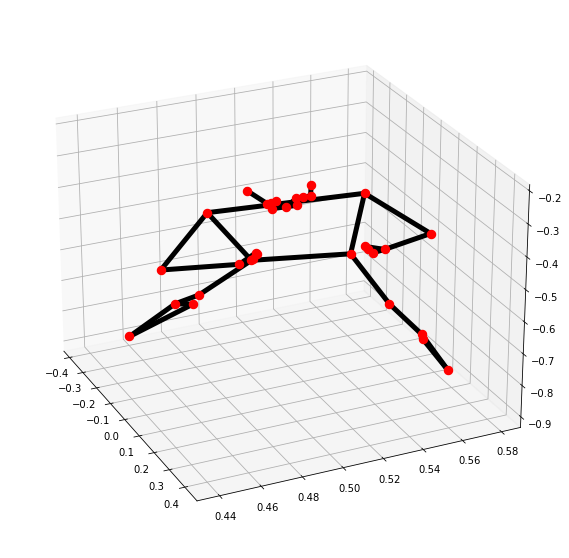

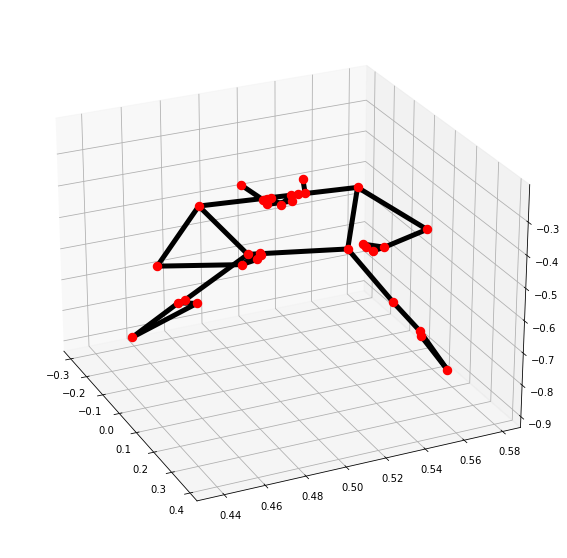

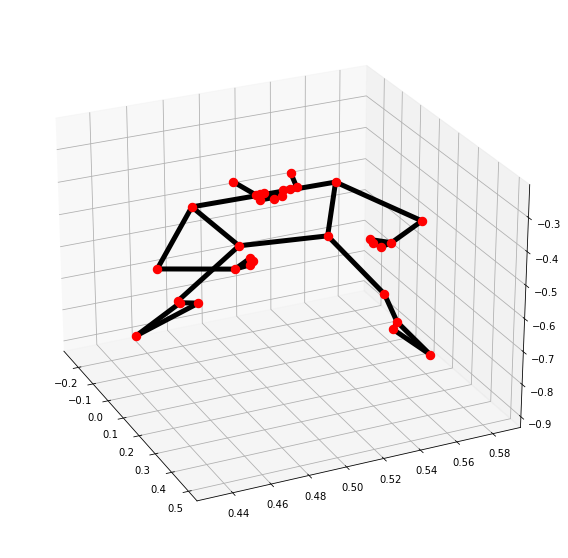

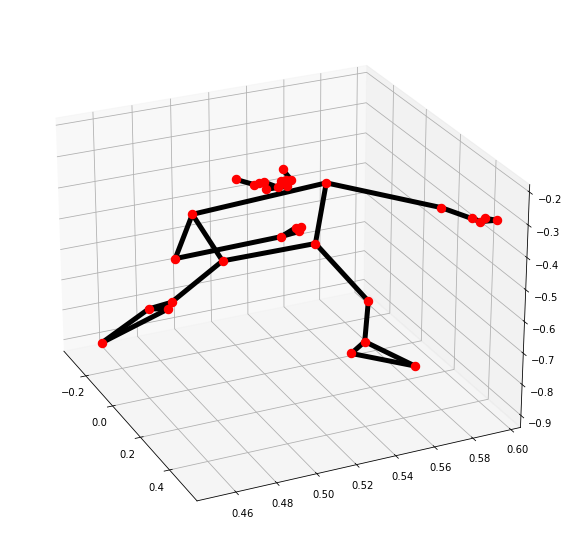

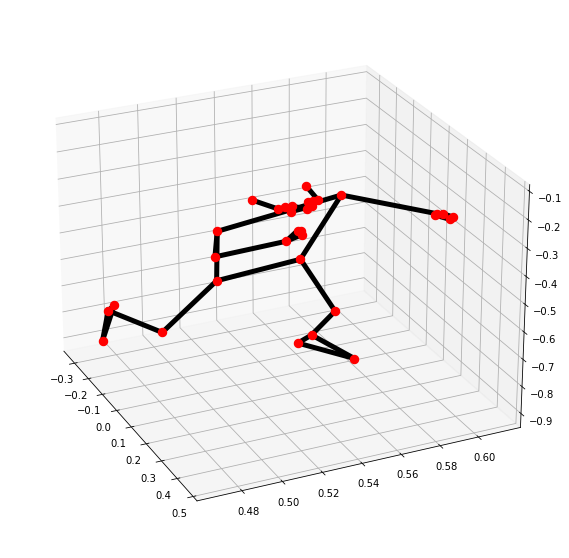

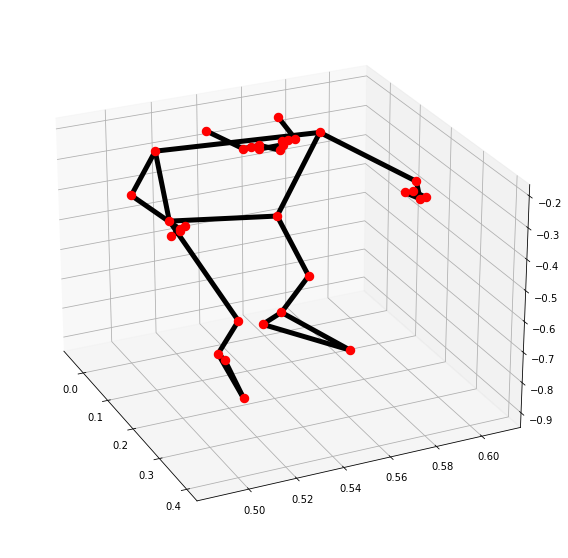

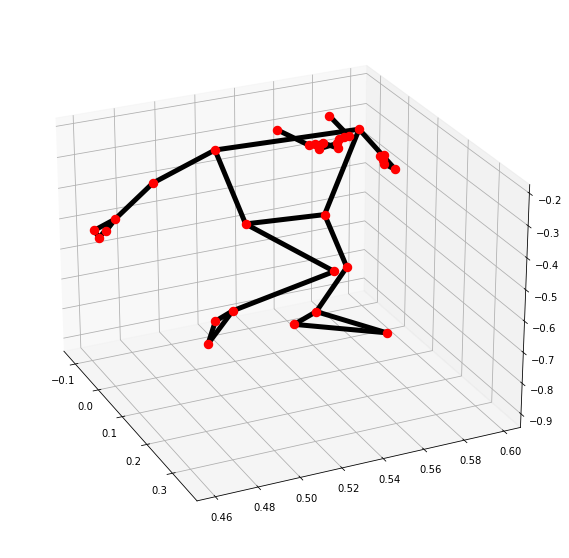

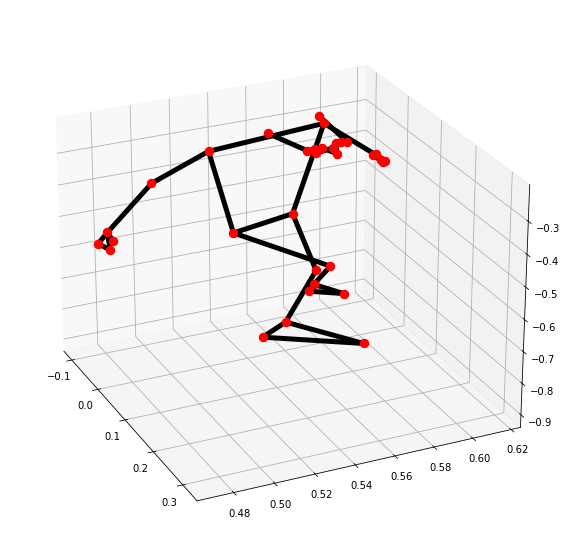

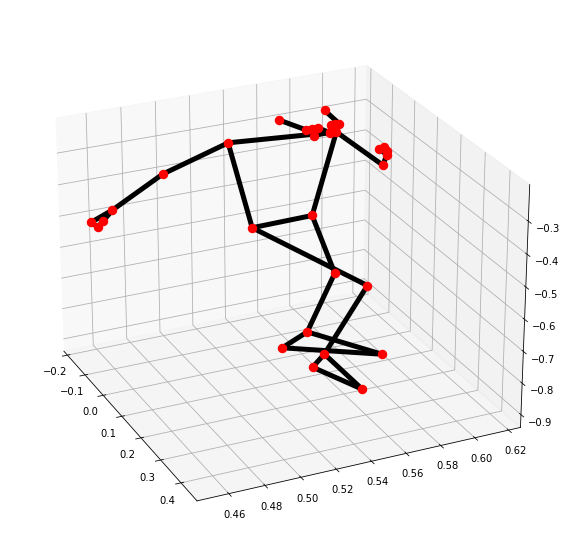

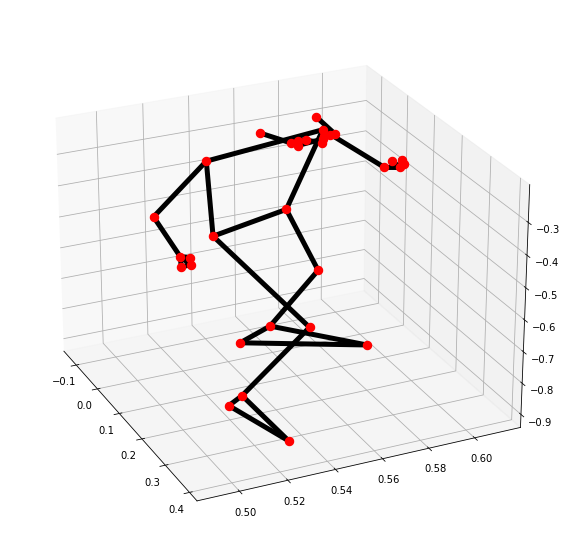

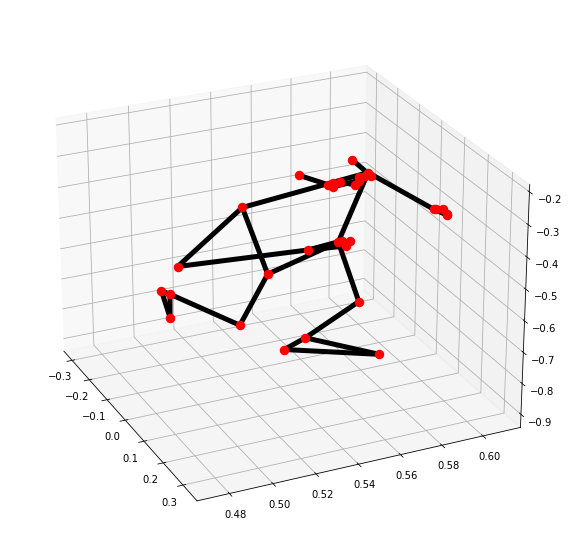

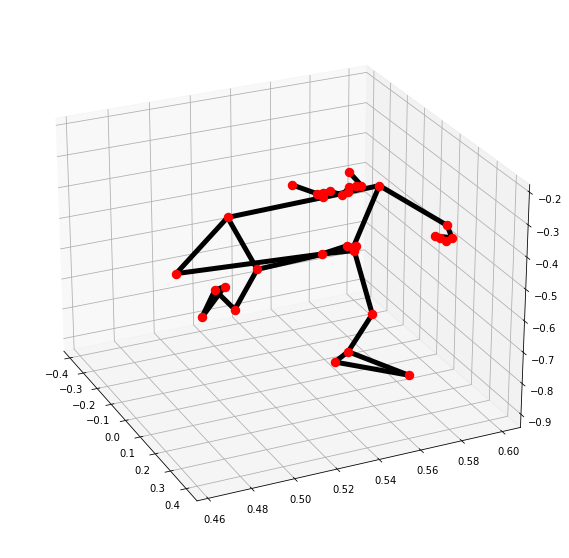

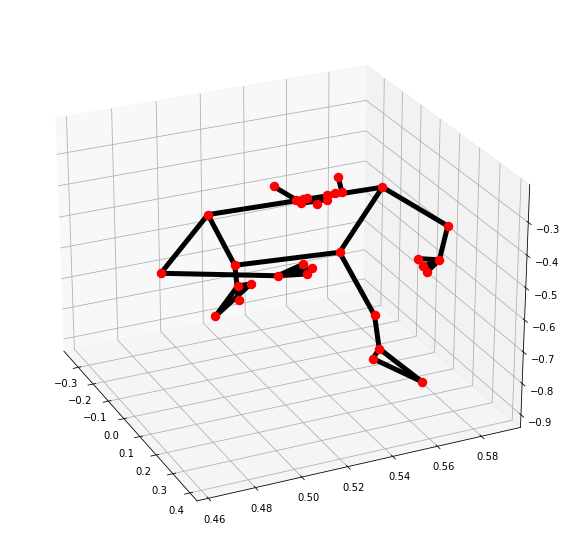

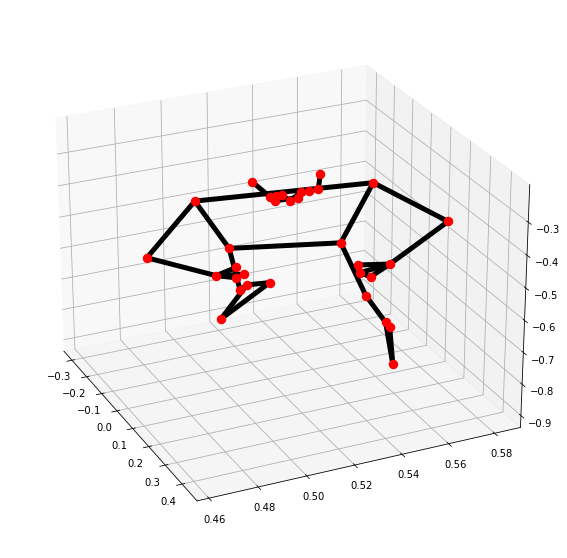

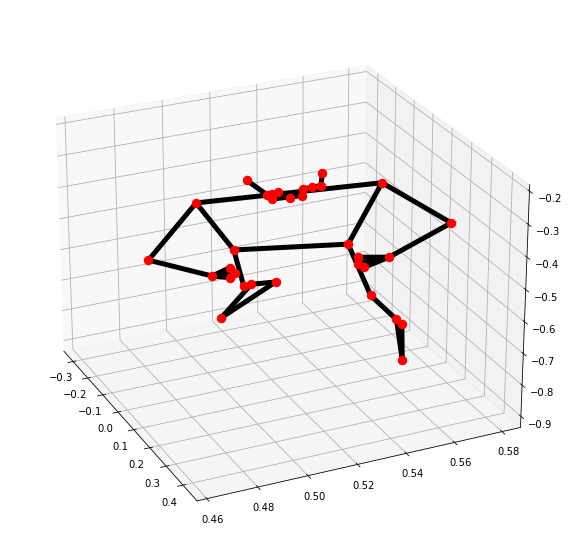

In [10]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=25, azimuth=-25)

### 2D graph view (x, y)

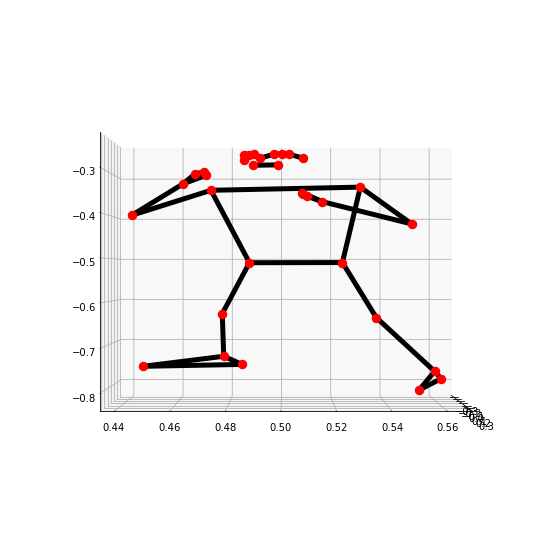

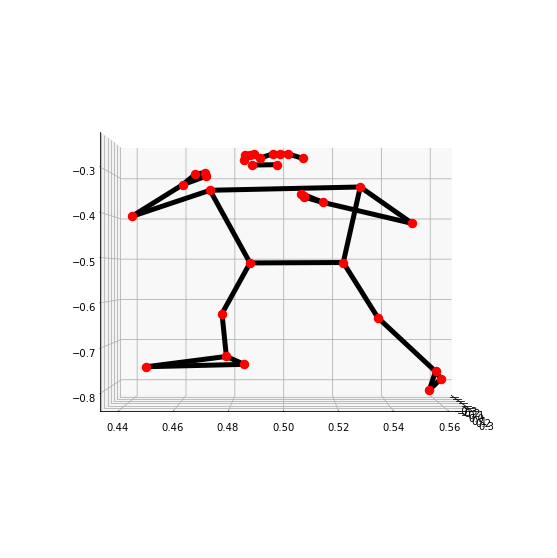

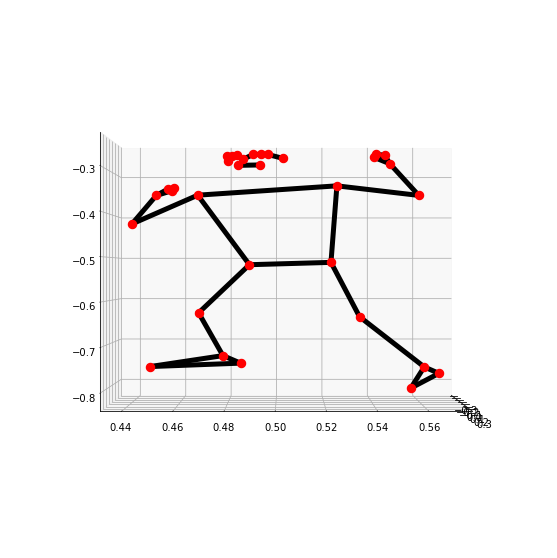

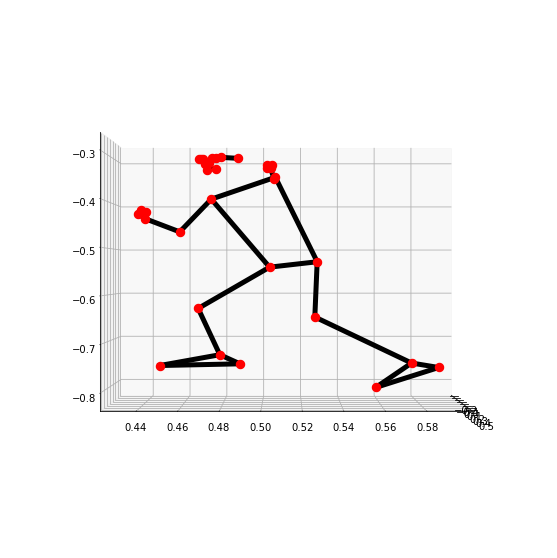

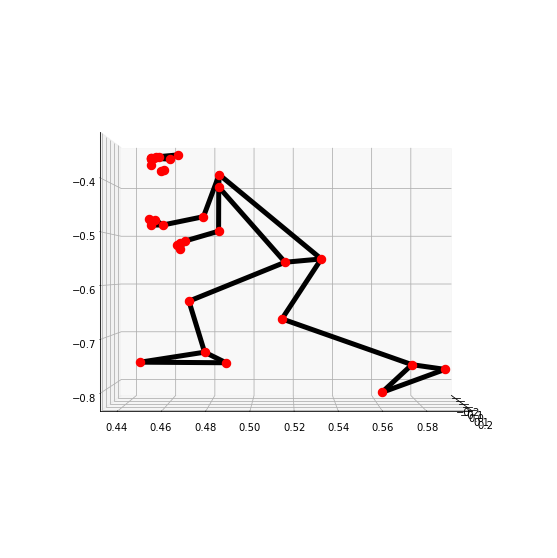

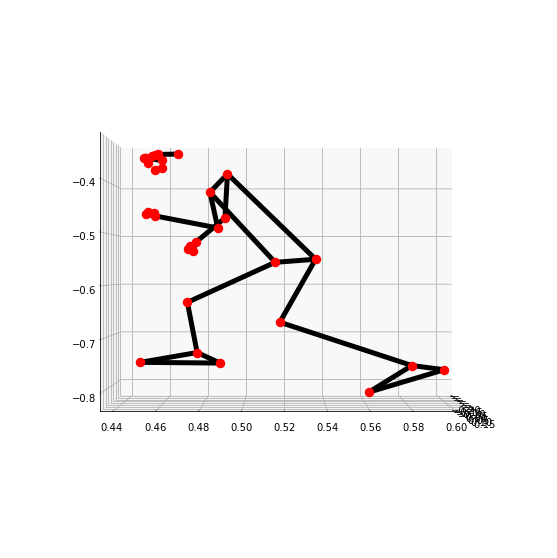

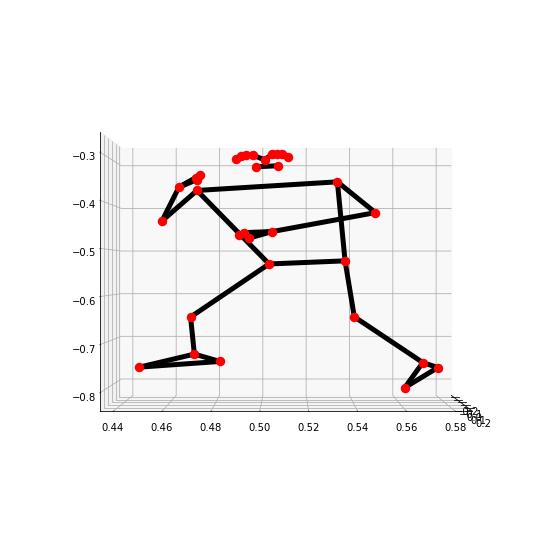

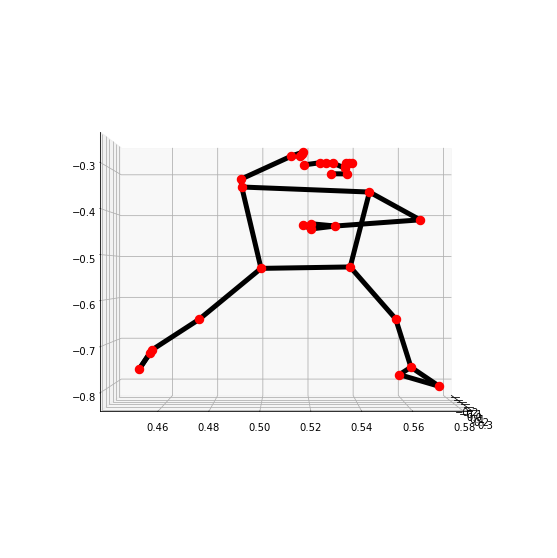

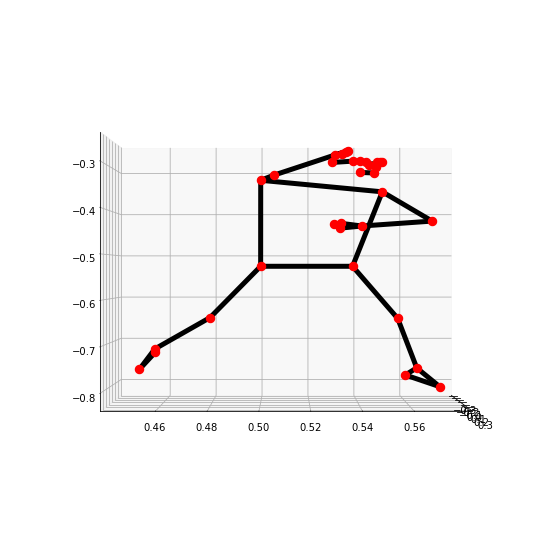

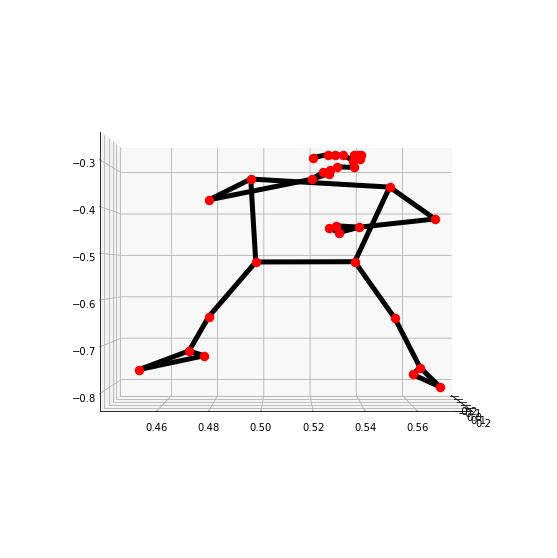

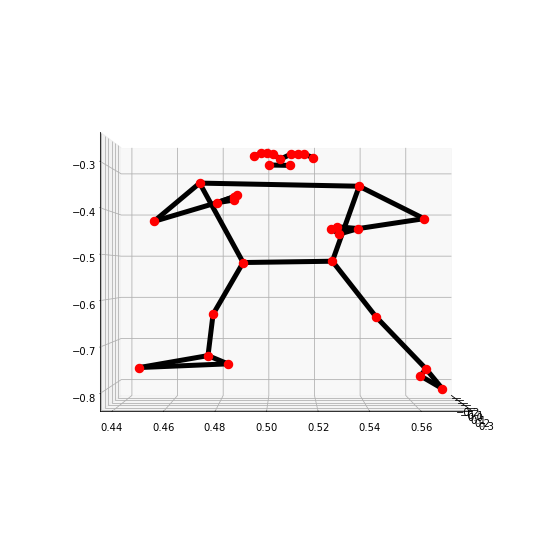

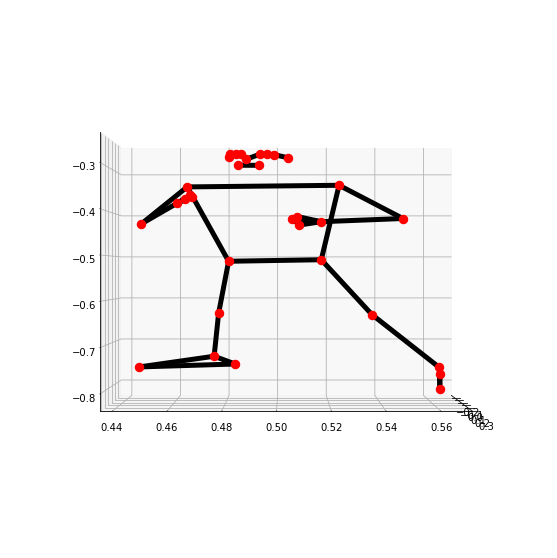

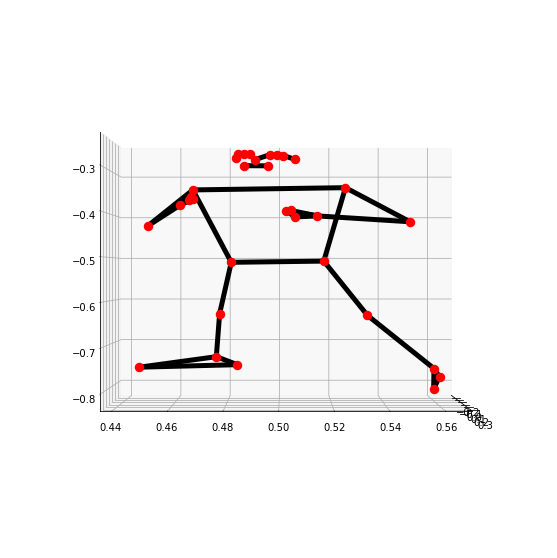

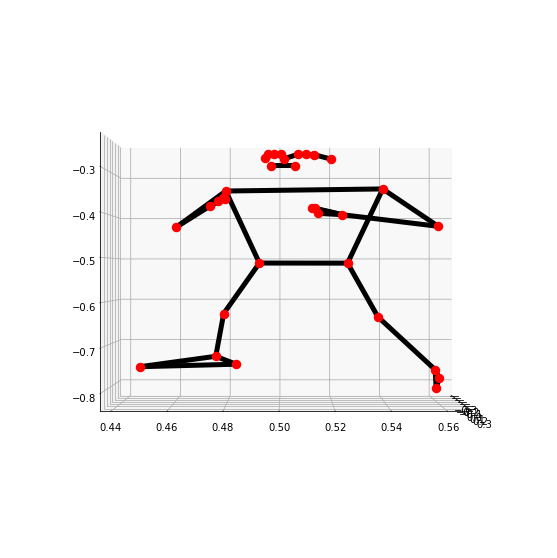

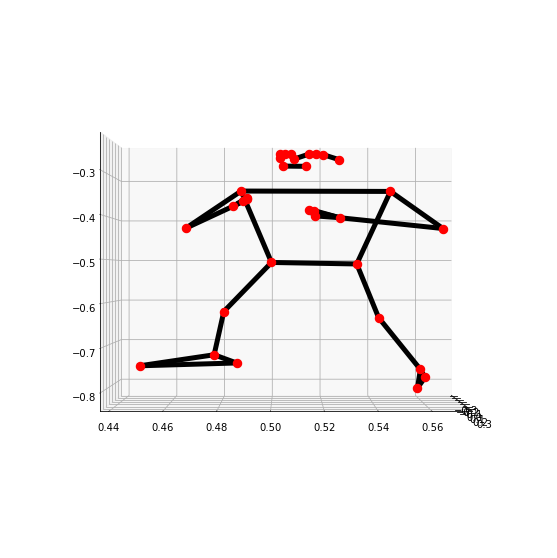

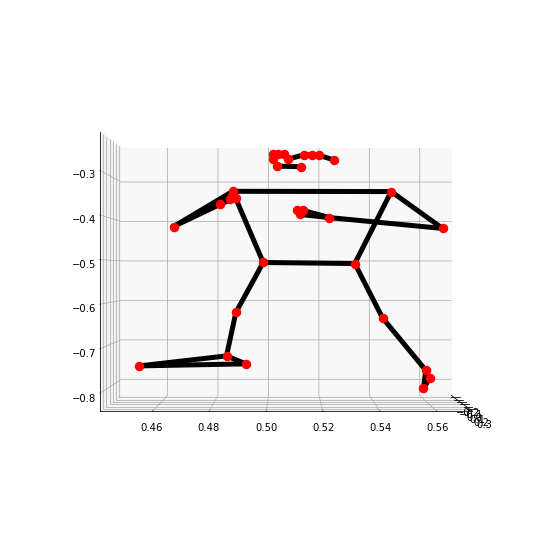

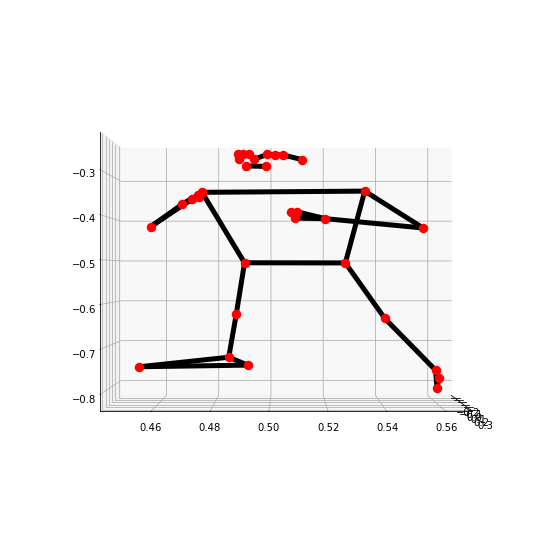

In [152]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### 2D graph view (z, y)

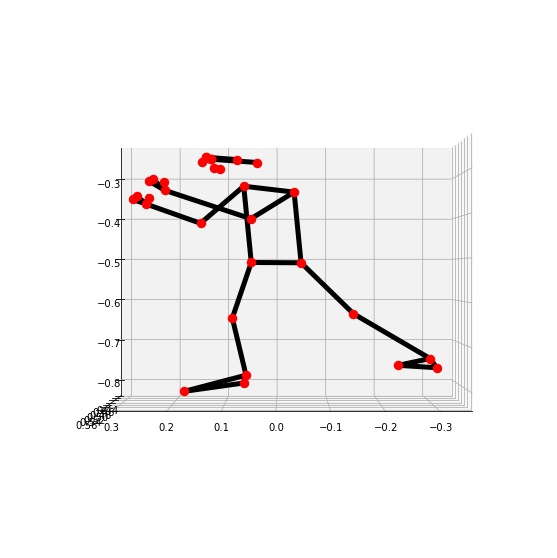

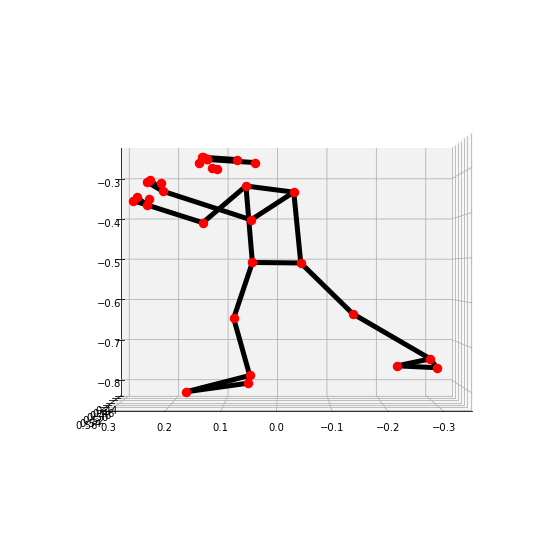

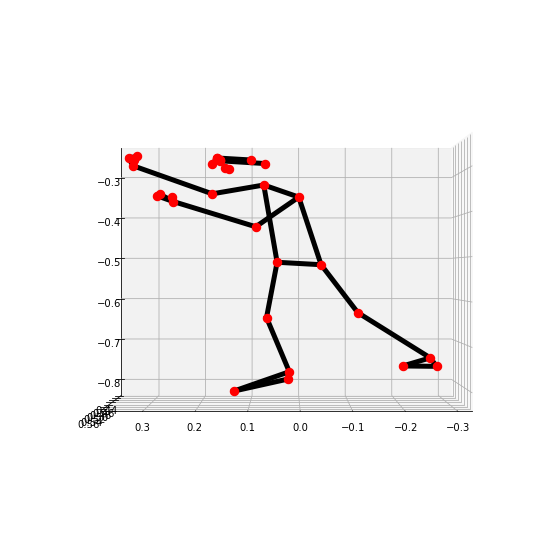

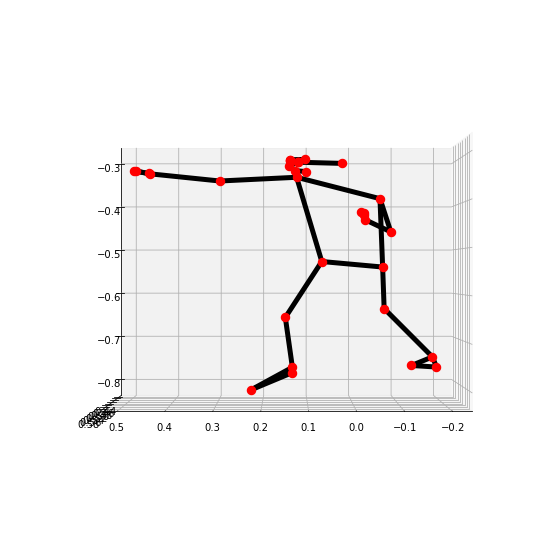

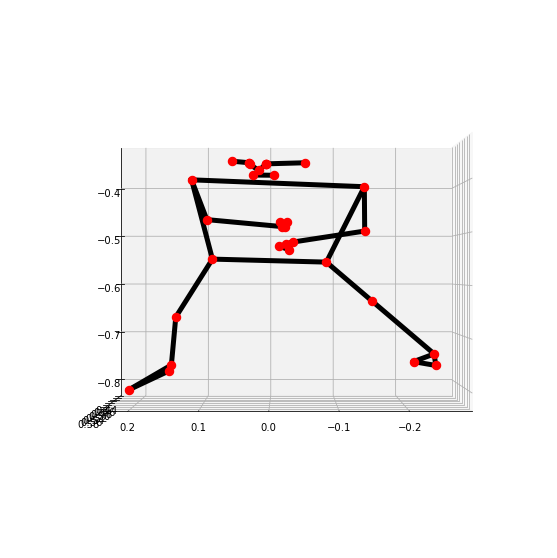

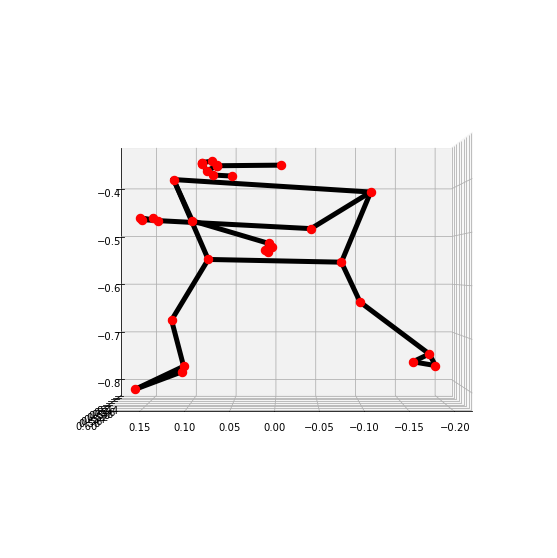

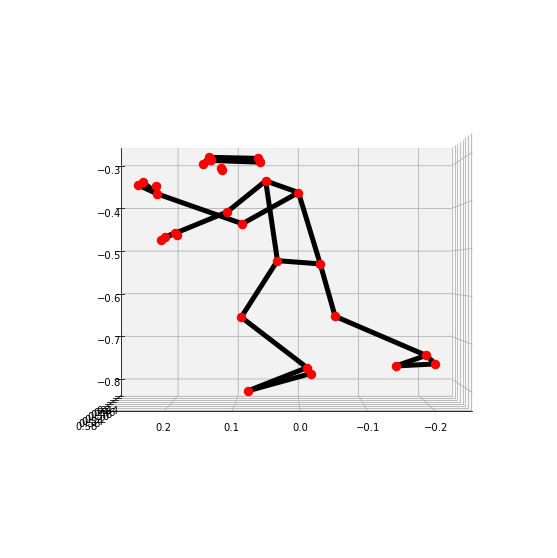

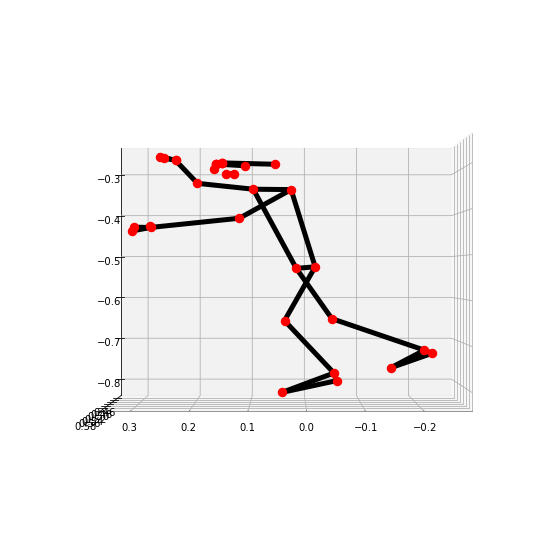

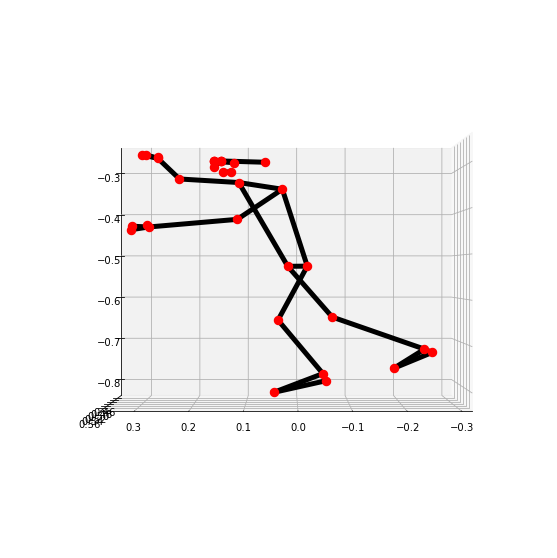

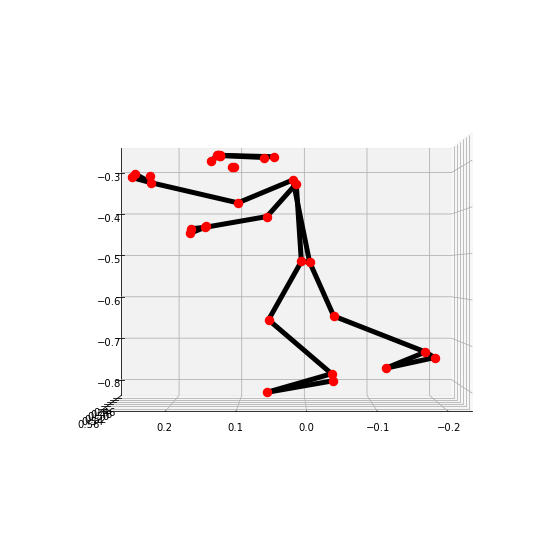

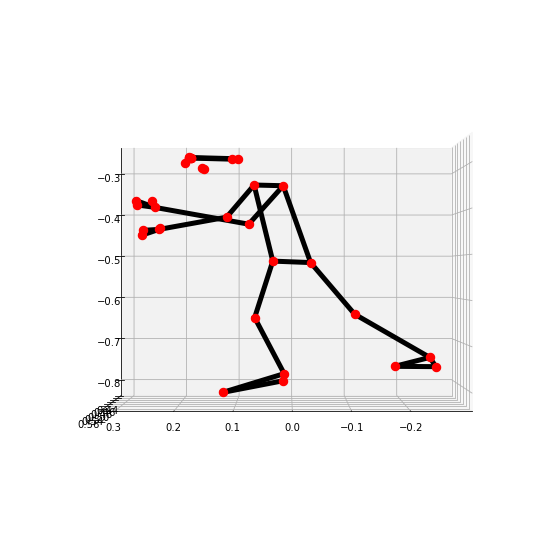

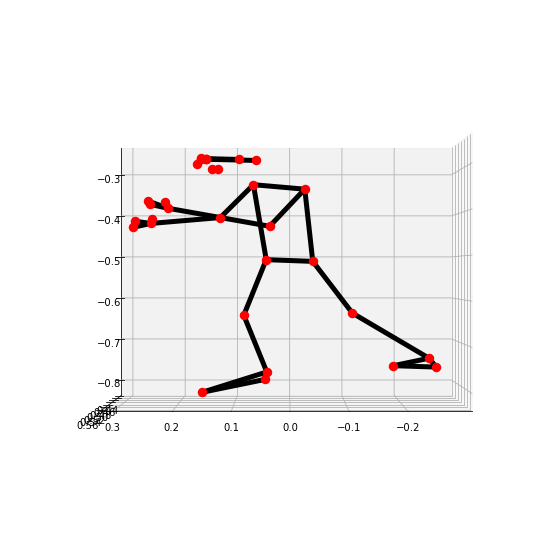

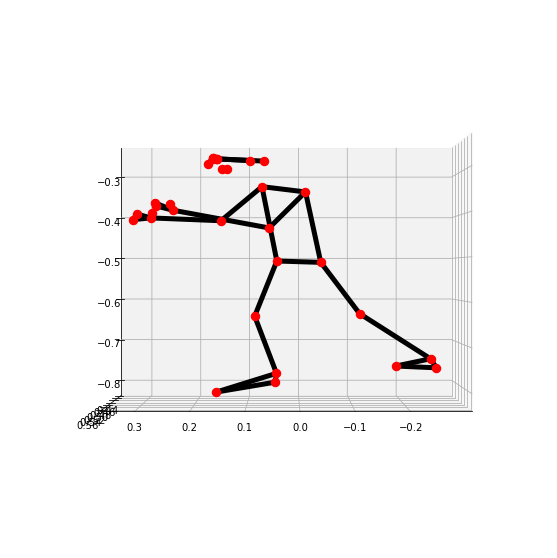

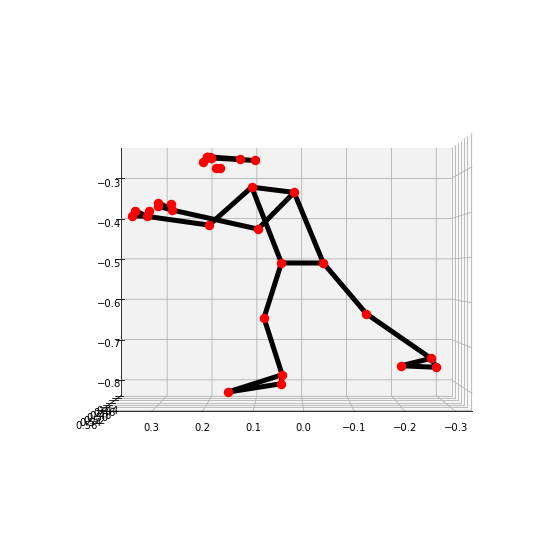

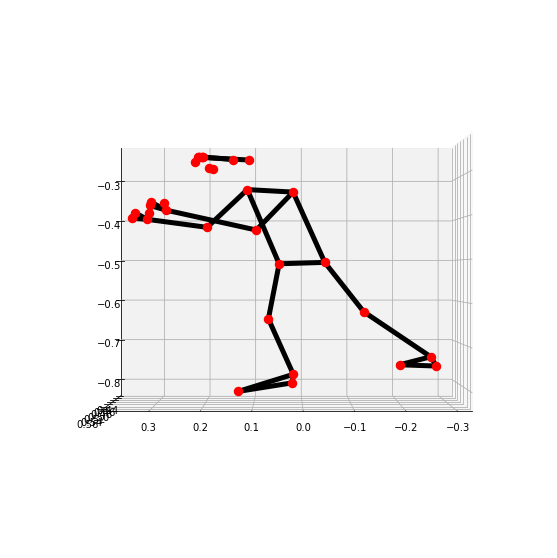

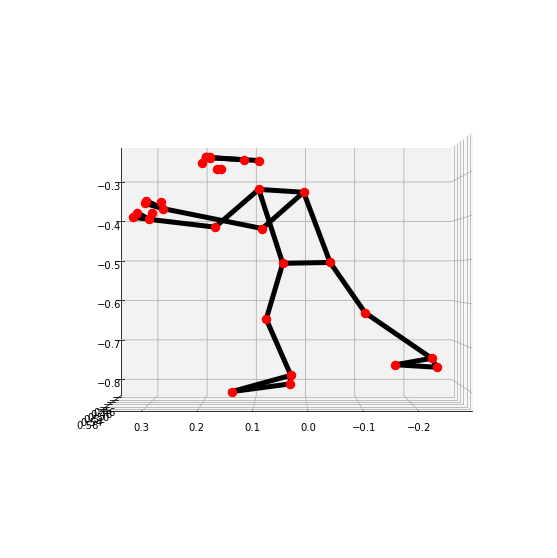

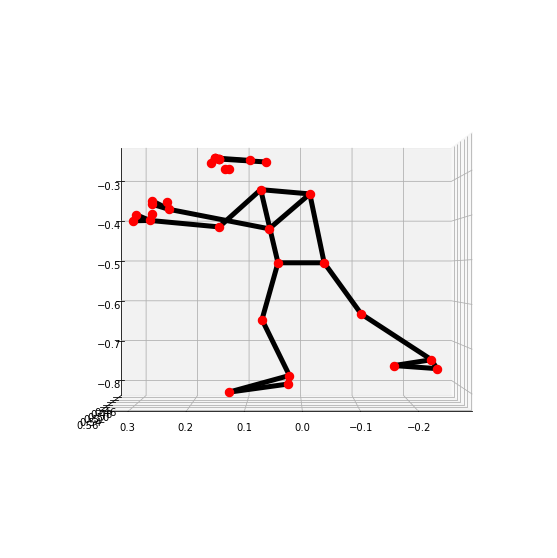

In [201]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=90)

### 2D graph view (x, z)

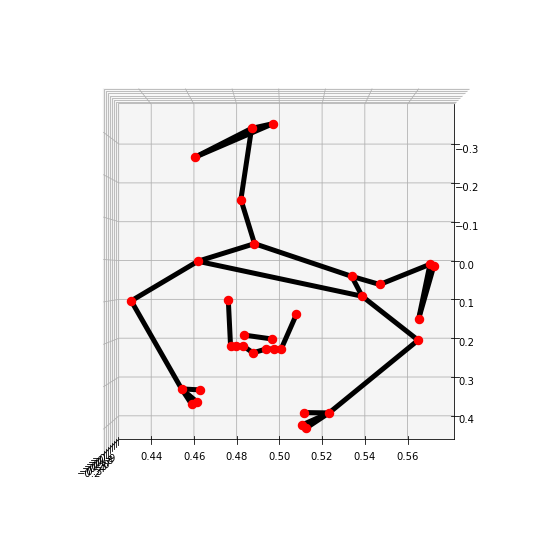

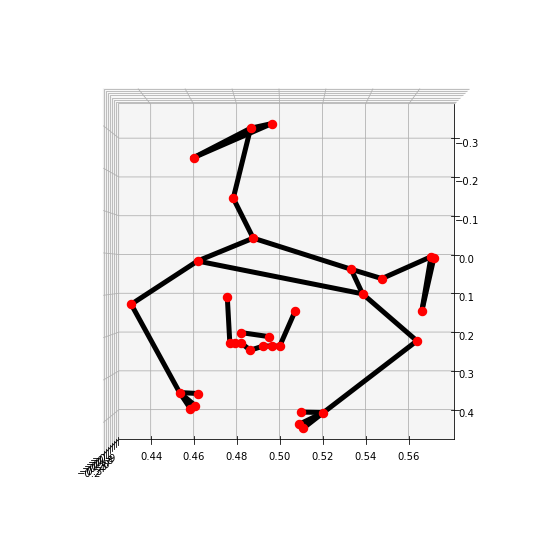

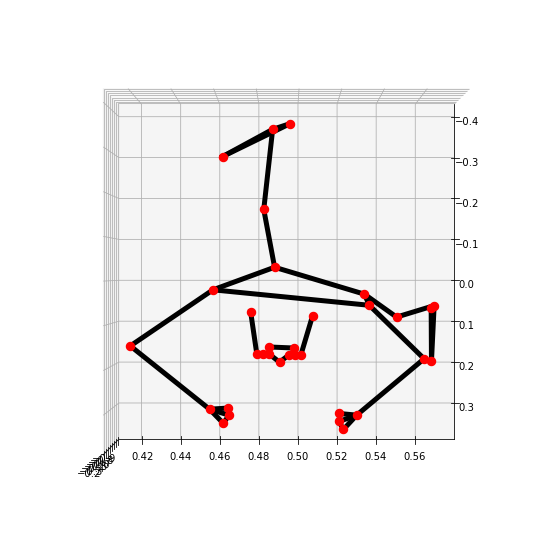

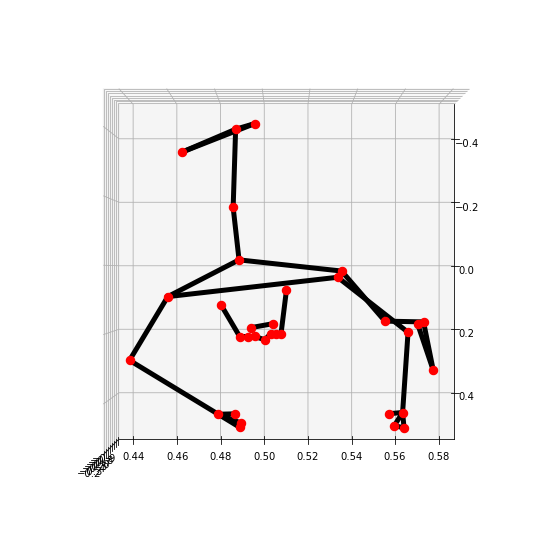

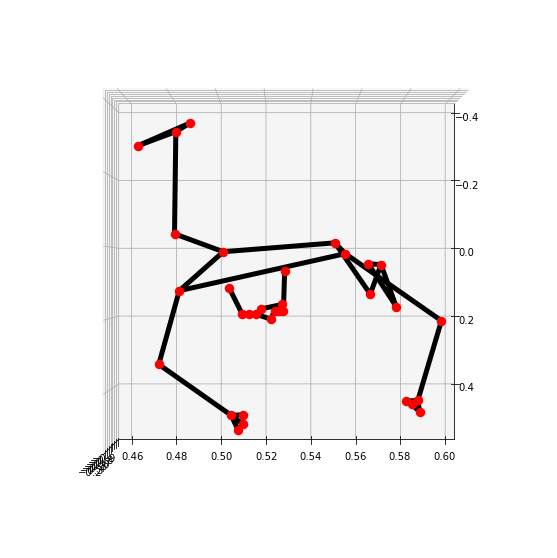

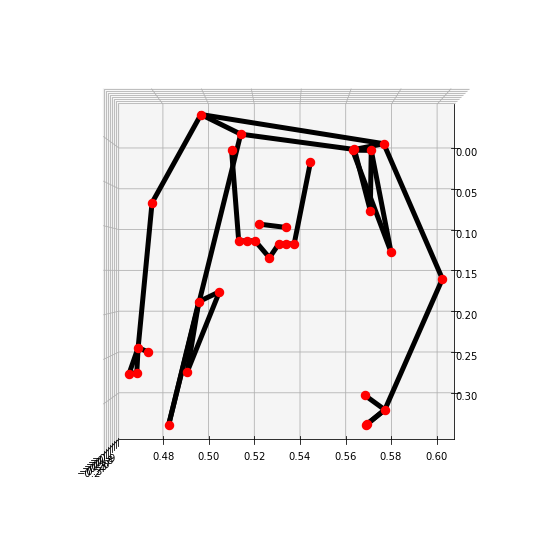

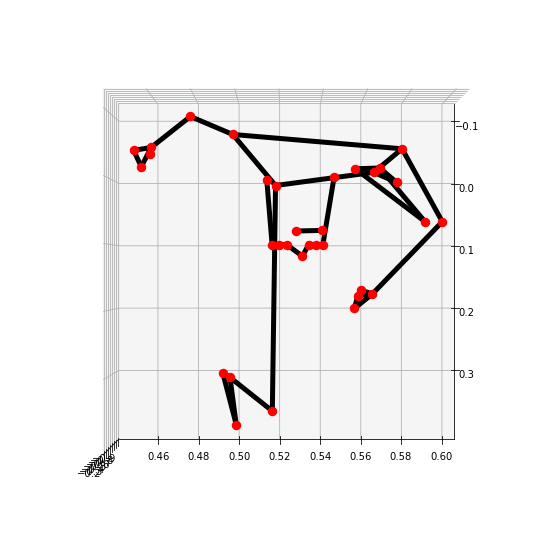

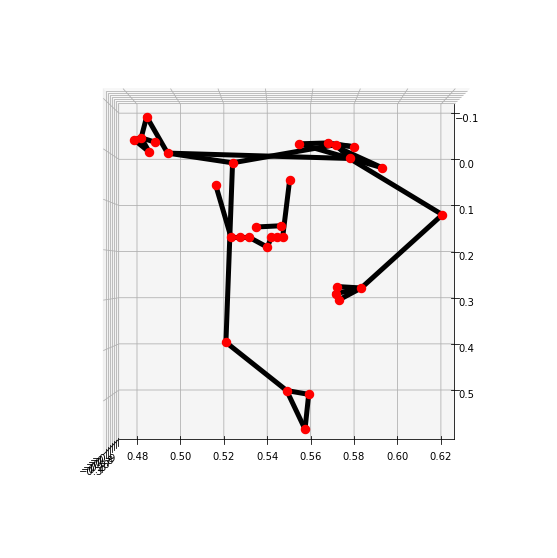

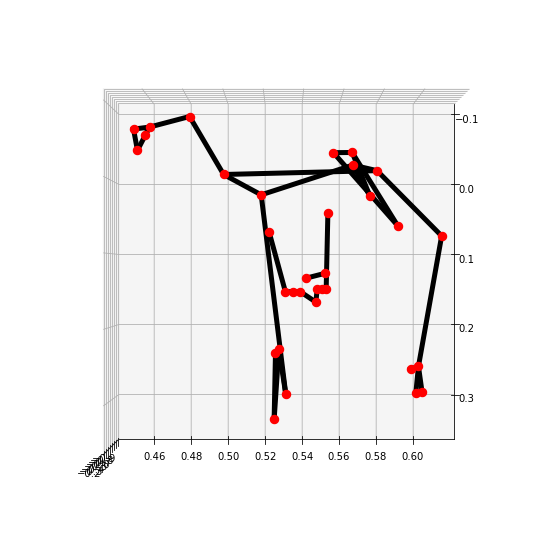

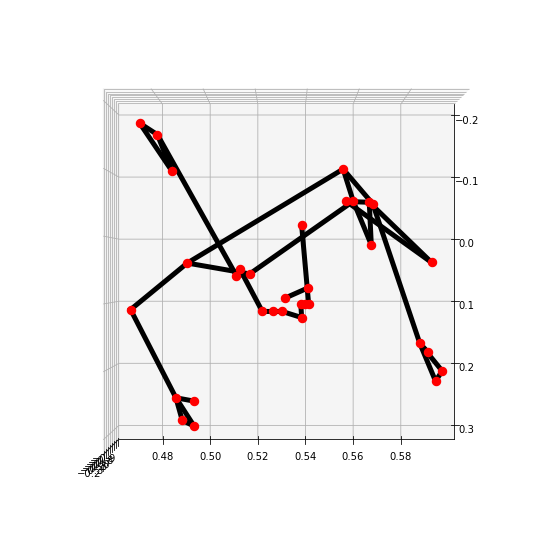

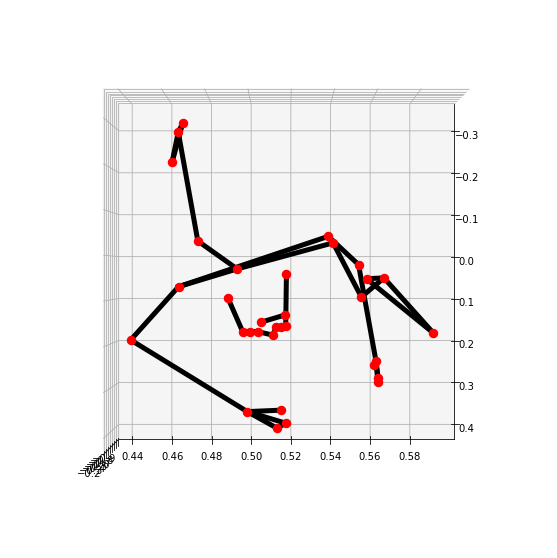

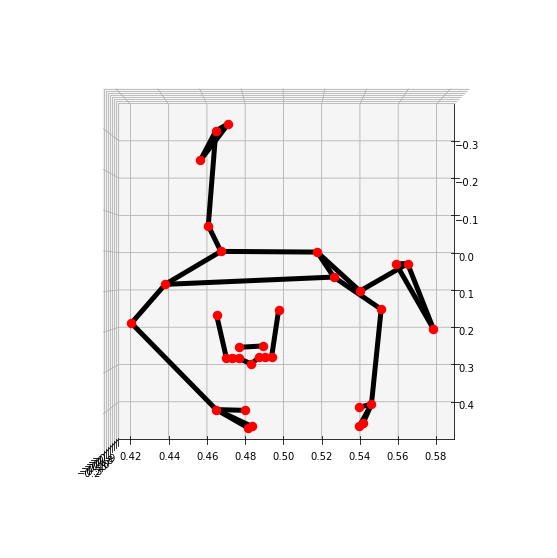

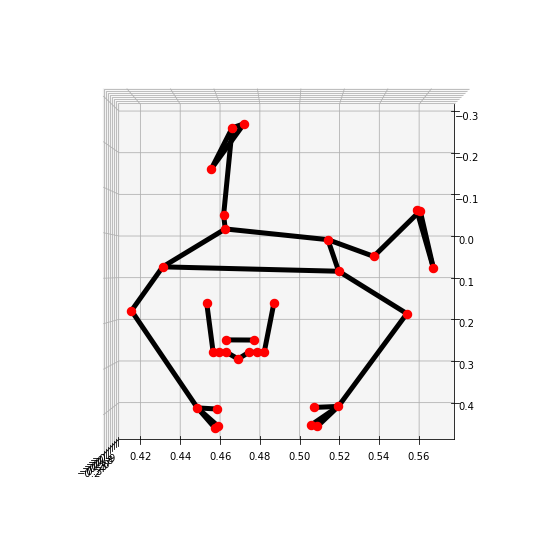

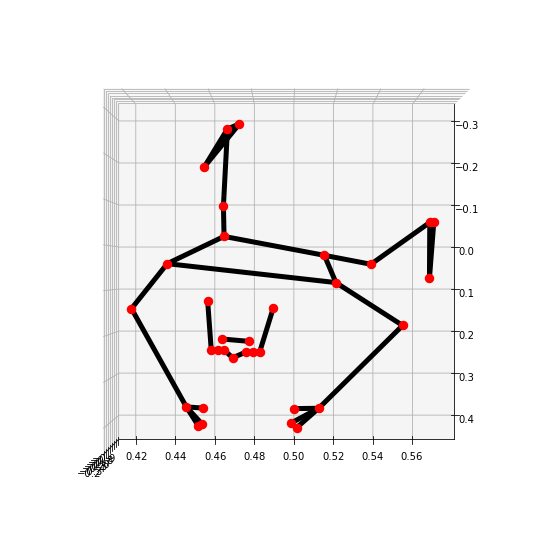

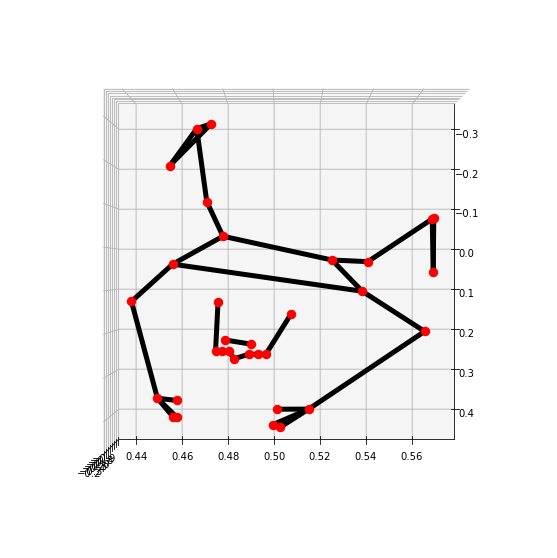

In [6]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=90, azimuth=0)

In [4]:
df = pd.read_csv('../video/train_csv/13.csv')
del df['Unnamed: 0']

In [5]:
df2 = df[df['clip_name'] == '13_20']
df2

clip_name  threshold       0_x       0_y       0_z       1_x       1_y  \
332     13_20          4  0.505545  0.271540 -0.152661  0.510554  0.261029   
333     13_20          8  0.506046  0.271520 -0.156254  0.510695  0.261082   
334     13_20         12  0.506408  0.273746 -0.161706  0.510767  0.262531   
335     13_20         16  0.496031  0.286897 -0.185064  0.500534  0.276007   
336     13_20         20  0.486436  0.325941 -0.152206  0.490400  0.314507   
337     13_20         24  0.472053  0.367910 -0.039870  0.474801  0.354281   
338     13_20         28  0.468473  0.381450 -0.029048  0.470329  0.367326   
339     13_20         32  0.498874  0.314359 -0.138186  0.502964  0.301874   
340     13_20         36  0.543589  0.300209 -0.172186  0.543652  0.288881   
341     13_20         40  0.563183  0.307925 -0.102664  0.562416  0.296354   
342     13_20         44  0.558316  0.304017 -0.137195  0.558804  0.291982   
343     13_20         48  0.528798  0.298985 -0.163458  0.532539  0.286964   
344     13_20         52  0.497082  0.286518 -0.174407  0.501537  0.275821   
345     13_20         56  0.489667  0.277772 -0.160753  0.495689  0.266899   
346     13_20         60  0.496404  0.272657 -0.179568  0.501389  0.261261   
347     13_20         64  0.508704  0.264946 -0.135643  0.515804  0.254258   
348     13_20         68  0.510017  0.264086 -0.150186  0.516803  0.253591   
349     13_20         72  0.505874  0.265234 -0.150855  0.512069  0.254613   

          1_z       2_x       2_y  ...      29_z      30_x      30_y  \
332 -0.146476  0.513349  0.261048  ... -0.037841  0.494188  0.754456   
333 -0.151291  0.513499  0.261055  ... -0.036091  0.494008  0.754119   
334 -0.155358  0.513581  0.262266  ...  0.012112  0.493753  0.753814   
335 -0.165592  0.502909  0.275736  ... -0.089390  0.493821  0.753280   
336 -0.144860  0.493231  0.313653  ... -0.078806  0.495514  0.756428   
337 -0.043876  0.476819  0.352683  ... -0.133290  0.495678  0.756747   
338 -0.038094  0.472284  0.365686  ... -0.133210  0.494270  0.757152   
339 -0.129112  0.505538  0.300765  ...  0.030425  0.489104  0.749466   
340 -0.132252  0.544822  0.288711  ... -0.001584  0.451009  0.733637   
341 -0.088511  0.562777  0.296116  ... -0.097720  0.449559  0.724153   
342 -0.120366  0.559841  0.292308  ...  0.054606  0.452801  0.728694   
343 -0.151478  0.534423  0.287319  ...  0.059536  0.479022  0.750948   
344 -0.162867  0.504137  0.276560  ...  0.055595  0.478678  0.751265   
345 -0.152782  0.498536  0.267203  ...  0.033272  0.480333  0.751620   
346 -0.173014  0.503579  0.261304  ...  0.047327  0.480527  0.753130   
347 -0.132136  0.518384  0.254475  ...  0.030762  0.489354  0.756994   
348 -0.149135  0.519735  0.254122  ...  0.021016  0.489859  0.758215   
349 -0.147687  0.514919  0.255072  ...  0.006920  0.489041  0.758223   

         30_z      31_x      31_y      31_z      32_x      32_y      32_z  
332  0.298145  0.574573  0.789925 -0.144360  0.457316  0.758235  0.230938  
333  0.311241  0.574883  0.790357 -0.142055  0.456706  0.758147  0.245616  
334  0.235026  0.576967  0.791331 -0.078054  0.457975  0.758529  0.176957  
335  0.242198  0.577574  0.790746 -0.203207  0.458443  0.760783  0.172099  
336  0.174735  0.581813  0.789977 -0.166704  0.453990  0.760446  0.121295  
337  0.160910  0.582834  0.788314 -0.189307  0.453339  0.757953  0.140488  
338  0.173146  0.583029  0.788697 -0.189040  0.455104  0.756744  0.154429  
339  0.228287  0.582457  0.790898 -0.053134  0.454970  0.760989  0.183793  
340  0.153559  0.598850  0.789757 -0.079259  0.459979  0.765473  0.106637  
341  0.255795  0.600559  0.790519 -0.180369  0.460250  0.766398  0.201247  
342  0.164818  0.600433  0.789623 -0.022860  0.460055  0.769811  0.088875  
343  0.200855  0.597207  0.788594 -0.027016  0.452118  0.771016  0.125378  
344  0.219904  0.594355  0.787649 -0.034044  0.448244  0.769238  0.152543  
345  0.232850  0.576050  0.786802 -0.061822  0.448582  0.768385  0.168112  
346  0.27327

In [6]:
def calAngleXY(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body1)], df.loc[df['threshold'] == threshold, '{}_y'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body2)], df.loc[df['threshold'] == threshold, '{}_y'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body3)], df.loc[df['threshold'] == threshold, '{}_y'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

def calAngleZY(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body1)], df.loc[df['threshold'] == threshold, '{}_y'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body2)], df.loc[df['threshold'] == threshold, '{}_y'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body3)], df.loc[df['threshold'] == threshold, '{}_y'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

def calAngleXZ(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body1)], df.loc[df['threshold'] == threshold, '{}_z'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body2)], df.loc[df['threshold'] == threshold, '{}_z'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body3)], df.loc[df['threshold'] == threshold, '{}_z'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

In [129]:
calAngleXY(df2, 24, '24', '14', '12')

144

In [130]:
#calAngleZY(df2, 36, 'right_shoulder', 'right_elbow', 'right_wrist')

In [368]:
#calAngleXZ(df2, 36, 'right_shoulder', 'right_elbow', 'right_wrist')

In [7]:
for i in range(4, len(df2)*4+1, 4):
    print("frame: {}, angle: {}".format(i, calAngleZY(df2, i, '14', '12', '24')))

frame: 4, angle: 61
frame: 8, angle: 64
frame: 12, angle: 52
frame: 16, angle: 64
frame: 20, angle: 60
frame: 24, angle: 12
frame: 28, angle: 17
frame: 32, angle: 56
frame: 36, angle: 103
frame: 40, angle: 131
frame: 44, angle: 110
frame: 48, angle: 60
frame: 52, angle: 47
frame: 56, angle: 47
frame: 60, angle: 50
frame: 64, angle: 37
frame: 68, angle: 43
frame: 72, angle: 43


## Test angles area

In [30]:
start = 4
end = 82

beginNode = '26'
middleNode = '24'
endNode = '12'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleXY(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 171.
Angle frame 8 is 170.
Angle frame 12 is 169.
Angle frame 16 is 168.
Angle frame 20 is 172.
Angle frame 24 is 173.
Angle frame 28 is 171.
Angle frame 32 is 179.
Angle frame 36 is 7.
Angle frame 40 is 10.
Angle frame 44 is 34.
Angle frame 48 is 155.
Angle frame 52 is 173.
Angle frame 56 is 171.
Angle frame 60 is 172.
Angle frame 64 is 174.
Angle frame 68 is 174.
Angle frame 72 is 176.
Angle frame 76 is 177.
Angle frame 80 is 178.


In [109]:
start = 4
end = 80

beginNode = '24'
middleNode = '23'
endNode = '25'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleZY(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 98.
Angle frame 8 is 97.
Angle frame 12 is 95.
Angle frame 16 is 22.
Angle frame 20 is 37.
Angle frame 24 is 42.
Angle frame 28 is 78.
Angle frame 32 is 60.
Angle frame 36 is 112.
Angle frame 40 is 123.
Angle frame 44 is 120.
Angle frame 48 is 97.
Angle frame 52 is 87.
Angle frame 56 is 103.
Angle frame 60 is 103.
Angle frame 64 is 94.
Angle frame 68 is 155.
Angle frame 72 is 81.
Angle frame 76 is 89.


In [76]:
start = 4
end = 84

beginNode = '14'
middleNode = '12'
endNode = '24'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleXZ(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 166.
Angle frame 8 is 167.
Angle frame 12 is 154.
Angle frame 16 is 177.
Angle frame 20 is 3.
Angle frame 24 is 169.
Angle frame 28 is 156.
Angle frame 32 is 154.
Angle frame 36 is 146.
Angle frame 40 is 130.
Angle frame 44 is 127.
Angle frame 48 is 172.
Angle frame 52 is 167.
Angle frame 56 is 164.
Angle frame 60 is 166.
Angle frame 64 is 179.
Angle frame 68 is 138.
Angle frame 72 is 156.
Angle frame 76 is 168.


TypeError: only size-1 arrays can be converted to Python scalars

In [71]:
class MuayThai:
    def __init__(self, path_clip_name, data, step, true_steps, cal_steps):
        self.path_clip_name = path_clip_name
        self.data = data
        self.step = step
        self.true_steps = true_steps
        self.cal_steps = cal_steps

    def get_data_size(self):
        return len(self.data)

    def cal_angle_xy(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def cal_angle_yz(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def cal_angle_xz(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def find_angles_sub_step(self, step_data, threshold):
        angles = []
        for sub_step in range(1, len(step_data)+1):
            filt = (step_data['sub_step'] == sub_step)
            axis = step_data.loc[filt, 'axis'].iloc[0]

            if axis == 'xy':
                angles.append(self.cal_angle_xy(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
            elif axis == 'yz':
                angles.append(self.cal_angle_yz(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
            elif axis == 'xz':
                angles.append(self.cal_angle_xz(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
        return angles

    #return boolean
    def check_sub_step(self, ans_step_data, angles):
        checked_sub_step = 0
        for sub_step in range(1, len(ans_step_data)+1):
            filt = (ans_step_data['sub_step'] == sub_step)
            compared = eval('{} {} {}'.format(angles[sub_step-1], ans_step_data.loc[filt, 'operator'].iloc[0],
                                        ans_step_data.loc[filt, 'true_angle'].iloc[0]))
            #print(ans_step_data)
            if compared:
                checked_sub_step += 1
        return checked_sub_step == len(ans_step_data)

    def check(self):
        point = 0
        curr_step = 1
        thresholds = self.data['threshold'].tolist()
        step_correct = []

        for i in range(len(thresholds)):
            threshold = thresholds[i]
            all_angles = []

            #Find angles for every step
            for step in range(curr_step, self.step+1):
                curr_step_data = self.cal_steps[self.cal_steps['step'] == step]
                angle = self.find_angles_sub_step(curr_step_data, threshold)
                #print(angle)
                all_angles.append(angle)
            step_round = 0
            #Compare angles for every step
            for step in range(curr_step, self.step+1):
                curr_ans_step_data = self.true_steps[self.true_steps['step'] == step]
                if self.check_sub_step(curr_ans_step_data, all_angles[step_round]):
                    step_correct.append(threshold)
                    point += 1
                    curr_step = step+1
                    print('Frame: {}, True angle: {}'.format(int(threshold), all_angles[step_round]))
                    print('Current point: {}'.format(point))
                    break
                step_round += 1
                
            #print(all_angles)

            if point == self.step:
                break

        return point, step_correct

    def get_landmarks(self):
        cap = cv2.VideoCapture(self.path_clip_name)
        frameTime = 1
        threshold = 0
        results_list = []
        diff = 4

        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while cap.isOpened():
                threshold += 1

                showed, frame = cap.read()
                if showed:
                    frame = cv2.resize(frame, (1920, 1080))

                    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    img.flags.writeable = False

                    results = holistic.process(img)

                    try:
                        landmarks = results.pose_landmarks.landmark
                    except:
                        pass

                    img.flags.writeable = True
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                    if threshold % diff == 0:
                        #cv2.imshow('Mediapipe Feed', img)
                        results_list.append(results)

                    if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                        break
                else:
                    break

            cap.release()
            cv2.destroyAllWindows()
            
        return results_list

    def show_true_graph(self, landmarks, true_answer_index):
        for i in range(len(true_answer_index)):
            mp_drawing.plot_landmarks(landmarks[true_answer_index[i]].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)
    
    '''
    def find_similarity_with_angle(self, MuayThai(tester)):
        # Find score & frame of self.df (trainer)
        trainer_point, trainer_true_frame = self.check()
        # Find score & frame
        tester_point, tester_true_frame = MuayThai(tester).check()
        
        # Score of trainer and tester must max
        if (trainer_point == self.step && tester_point == self.step):
            #Get data frame of trainer and tester (get angle of bodies)
            
            #Find similarity between 2 frame using fastdtw
            
        elif (tester_point < self.step):
            #Notice tester is not pass
            
            
    '''
    
    '''
    def find_similarity_with_axis(self, MuayThai(tester)):
        # Find score & frame of self.df (trainer)
        trainer_point, trainer_true_frame = self.check()
        # Find score & frame
        tester_point, tester_true_frame = MuayThai(tester).check()
        
        # Score of trainer and tester must max
        if (trainer_point == self.step && tester_point == self.step):
            #Get data frame of trainer and tester (get axis of bodies)
            
            #Find similarity between 2 frame using fastdtw
            
        elif (tester_point < self.step):
            #Notice tester is not pass
            
    '''

### Test system

In [169]:
pose1 = 6
pose2 = 6

df1 = pd.read_csv('../video/data/{}.csv'.format(pose1))
df2 = pd.read_csv('../video/data/{}.csv'.format(pose2))
del df1['Unnamed: 0']
del df2['Unnamed: 0']

In [168]:
clip_name1 = 1
clip_name2 = 4
df1 = df1[df1['clip_name'] == '{}_{}'.format(pose1, clip_name1)]
df2 = df2[df2['clip_name'] == '{}_{}'.format(pose2, clip_name2)]

In [165]:
distance_x, warp_path_x = fastdtw(df1['26_x'], df2['26_x'], dist=euclidean)
distance_y, warp_path_y = fastdtw(df1['26_y'], df2['26_y'], dist=euclidean)
distance_z, warp_path_z = fastdtw(df1['26_z'], df2['26_z'], dist=euclidean)

In [166]:
def sum_all(*args):
    return sum(args)

sum_all(distance_x, distance_y, distance_z)/3

0.3353418565044801

In [4]:
def sum_all(*args):
    return sum(args)

#Static definition
train_pose = 15
train_df = pd.read_csv('../video/train_csv/{}.csv'.format(train_pose))
test_df = pd.read_csv('../video/train_csv/15.csv')
del train_df['Unnamed: 0']
del test_df['Unnamed: 0']

#body_node = 26
body_lst = [16, 14, 12, 11, 13, 15, 24, 23, 26, 25, 28, 27]

#Dynamically change
test_df = test_df[test_df['clip_name'] == '15_6']

total_clip = 35

total_clip_avg = 0
for i in range(1, total_clip+1):
    total_sum_body_avg = 0
    for body_node in body_lst:
        curr_train_df = train_df[train_df['clip_name'] == '{}_{}'.format(train_pose, i)]

        distance_x, warp_path_x = fastdtw(curr_train_df['{}_x'.format(body_node)], test_df['{}_x'.format(body_node)], dist=euclidean)
        distance_y, warp_path_y = fastdtw(curr_train_df['{}_y'.format(body_node)], test_df['{}_y'.format(body_node)], dist=euclidean)
        distance_z, warp_path_z = fastdtw(curr_train_df['{}_z'.format(body_node)], test_df['{}_z'.format(body_node)], dist=euclidean)

        sum_body_avg = sum_all(distance_x, distance_y, distance_z)/3
        total_sum_body_avg += sum_body_avg
    #print('clip {}: {}'.format(i, total_sum_body_avg/len(body_lst)))
    total_clip_avg += total_sum_body_avg
    
print('Similar of clip: {}'.format(total_clip_avg/total_clip))

Similar of clip: 6.483853451091827


## Dynamic time warping test

In [5]:
def sum_all(*args):
    return sum(args)

#Assign total train clip
total_train_clip = [6, 7, 13, 15]

#Assign 1 test clip
test_df = pd.read_csv('../video/test_csv/test.csv')
del test_df['Unnamed: 0']
#test_df = test_df[test_df['clip_name'] == '15_16']

#Assign total body node
body_lst = [16, 14, 12, 11, 13, 15, 24, 23, 26, 25, 28, 27]

for train_clip in total_train_clip:
    #Assign each train clip
    train_df = pd.read_csv('../video/train_csv/{}.csv'.format(train_clip))
    del train_df['Unnamed: 0']
    
    #Assign total subclip of each train clip
    total_sub_clip = 35
    total_clip_avg = 0
    
    #Loop for each train clip
    for i in range(1, total_sub_clip+1):
        total_sum_body_avg = 0
        
        #Loop for each body node
        for body_node in body_lst:
            curr_train_df = train_df[train_df['clip_name'] == '{}_{}'.format(train_clip, i)]

            distance_x, warp_path_x = fastdtw(curr_train_df['{}_x'.format(body_node)], test_df['{}_x'.format(body_node)], dist=euclidean)
            distance_y, warp_path_y = fastdtw(curr_train_df['{}_y'.format(body_node)], test_df['{}_y'.format(body_node)], dist=euclidean)
            distance_z, warp_path_z = fastdtw(curr_train_df['{}_z'.format(body_node)], test_df['{}_z'.format(body_node)], dist=euclidean)

            sum_body_avg = sum_all(distance_x, distance_y, distance_z)/3
            total_sum_body_avg += sum_body_avg
        total_clip_avg += total_sum_body_avg
    
    print('Similar of clip {}: {}'.format(train_clip, total_clip_avg/total_sub_clip))

Similar of clip 6: 13.974154822471418
Similar of clip 7: 11.967728435235125
Similar of clip 13: 13.984043822263942
Similar of clip 15: 17.93617957324625


## 6.ตาเถรค้ำพัก

In [12]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '23', 'true_angle': 90, 'operator': '<'},
{'step': 3, 'sub_step': 1, 'main_node': '13', 'true_angle': 125, 'operator': '<='},
{'step': 3, 'sub_step': 2, 'main_node': '11', 'true_angle': 80, 'operator': '>'},
{'step': 3, 'sub_step': 3, 'main_node': '14', 'true_angle': 110, 'operator': '<='},
{'step': 3, 'sub_step': 4, 'main_node': '12', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 2, 'main_node': '12', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 3, 'main_node': '23', 'true_angle': 100, 'operator': '>'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '24', 'main_node': '23', 'end_node': '25' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'yz'},
{'step': 3, 'sub_step': 3, 'begin_node': '12', 'main_node': '14', 'end_node': '22' , 'axis': 'xy'},
{'step': 3, 'sub_step': 4, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'xy'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 4, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 4, 'sub_step': 3, 'begin_node': '24', 'main_node': '23', 'end_node': '11' , 'axis': 'xy'}])

### Test class

In [13]:
df = pd.read_csv('../video/train_csv/6.csv')
del df['Unnamed: 0']

In [14]:
clip_name = 33
m2 = MuayThai('../video/train_clip/6/{}.MOV'.format(clip_name), df[df['clip_name'] == '6_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [15]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [9, 22]
Current point: 1
Frame: 12, True angle: [27]
Current point: 2
Frame: 24, True angle: [83, 86, 38, 13]
Current point: 3
Frame: 36, True angle: [108, 114, 116]
Current point: 4


4

In [16]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [17]:
landmarks = m2.get_landmarks()

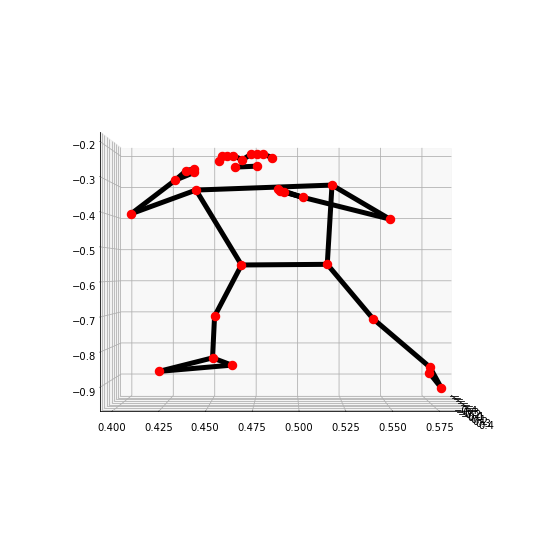

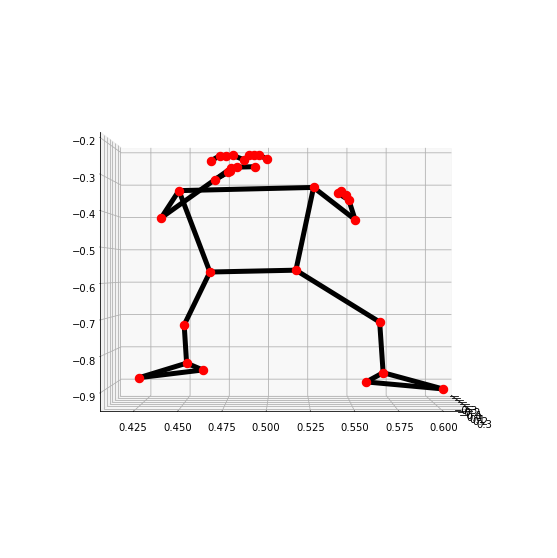

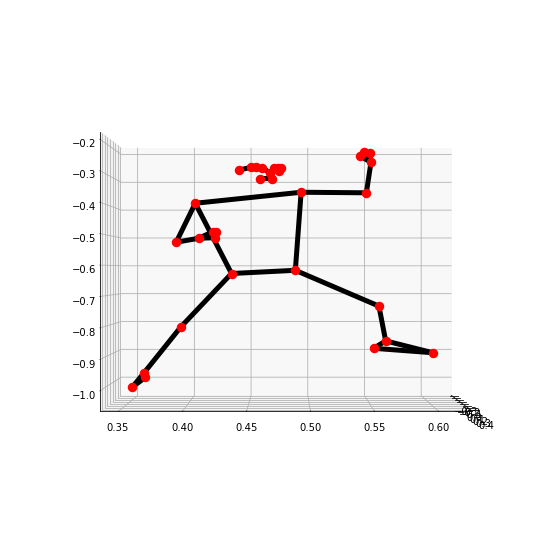

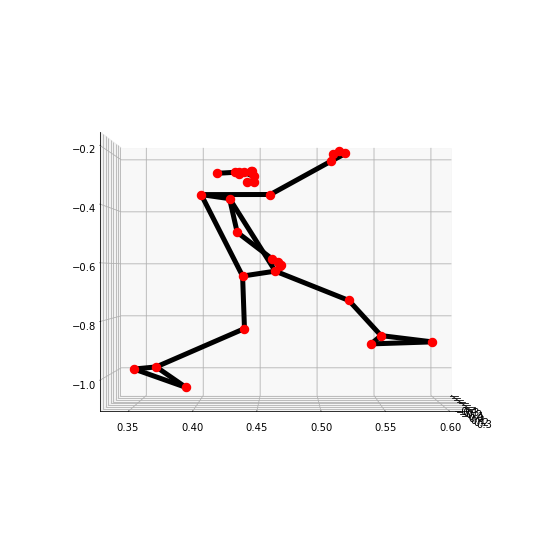

In [18]:
m2.show_true_graph(landmarks, true_step_frame_index)

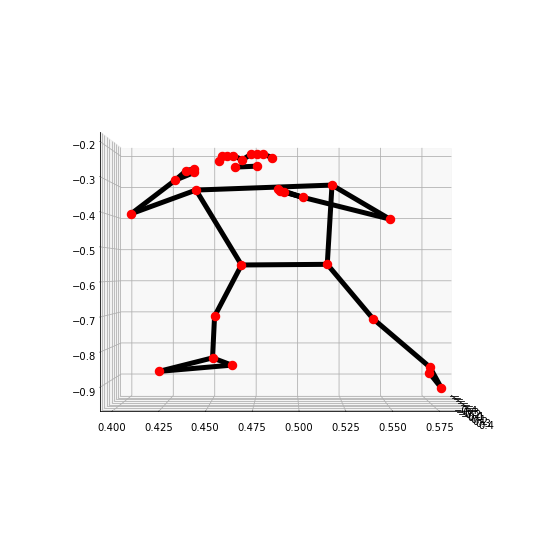

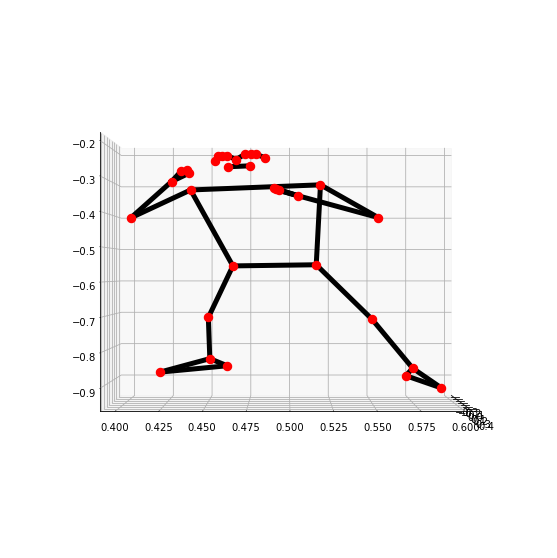

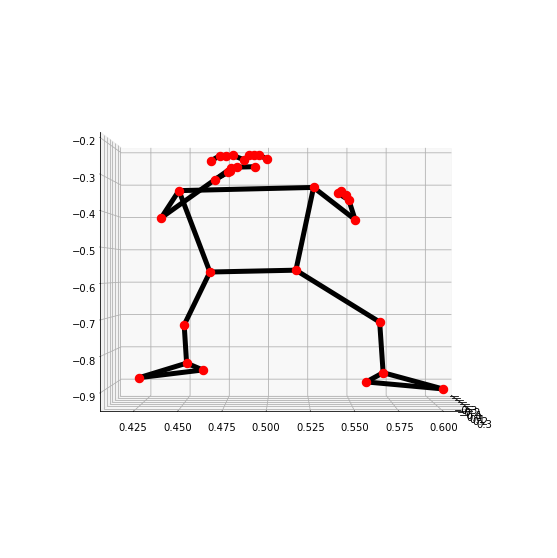

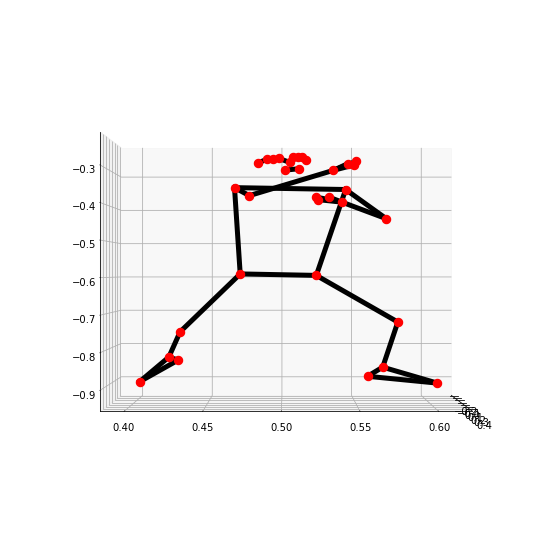

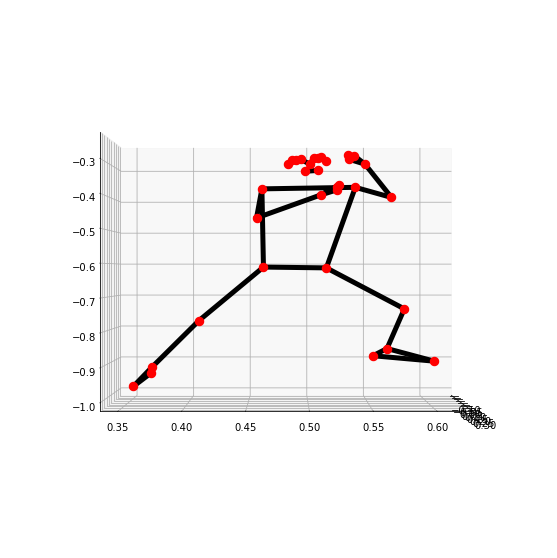

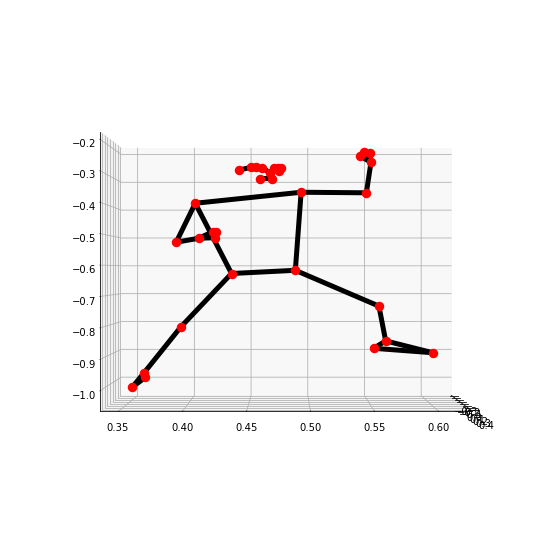

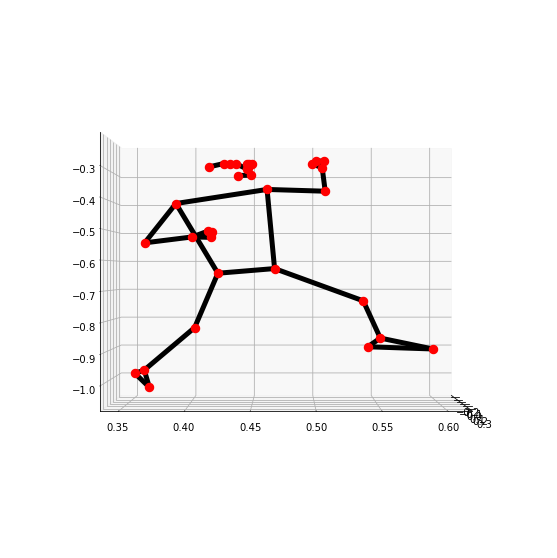

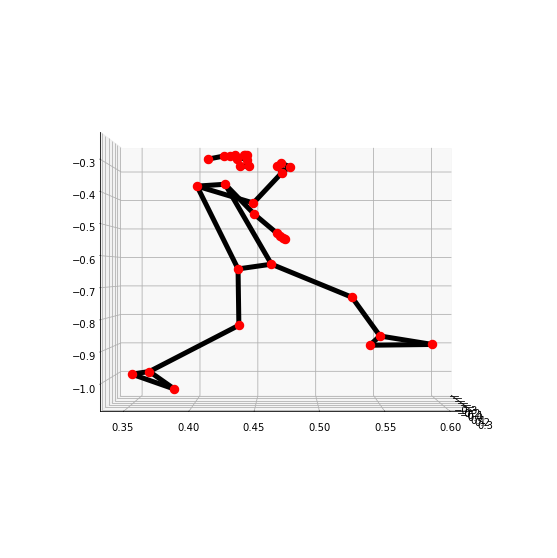

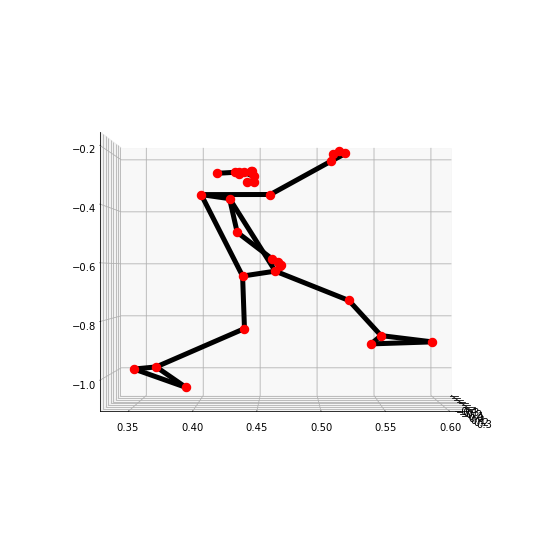

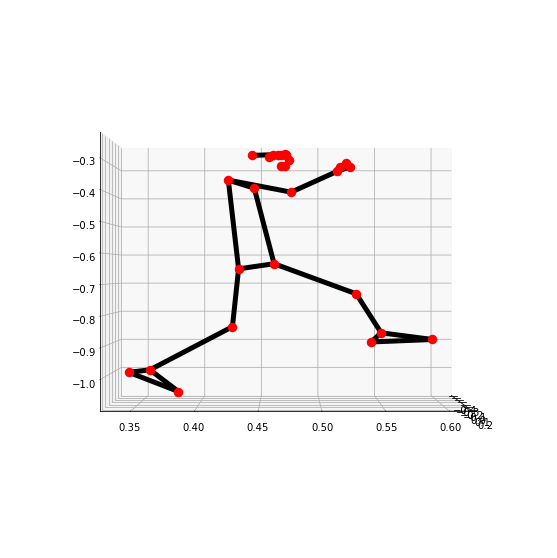

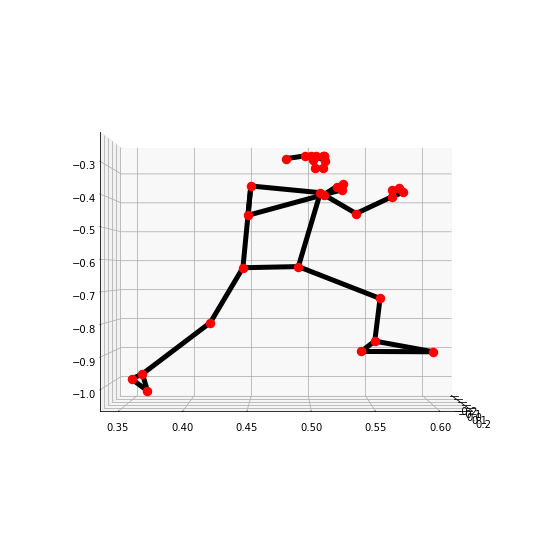

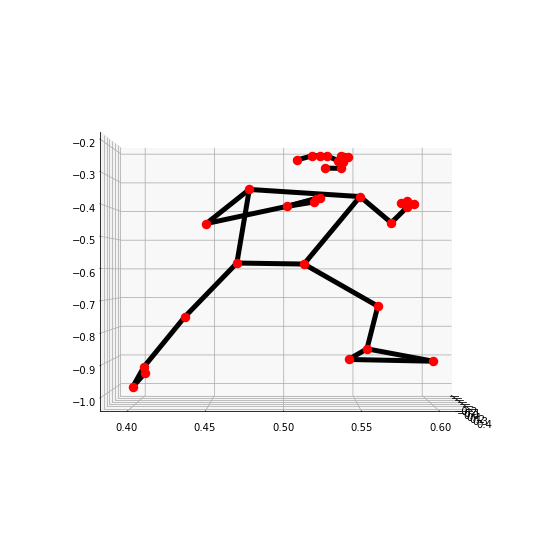

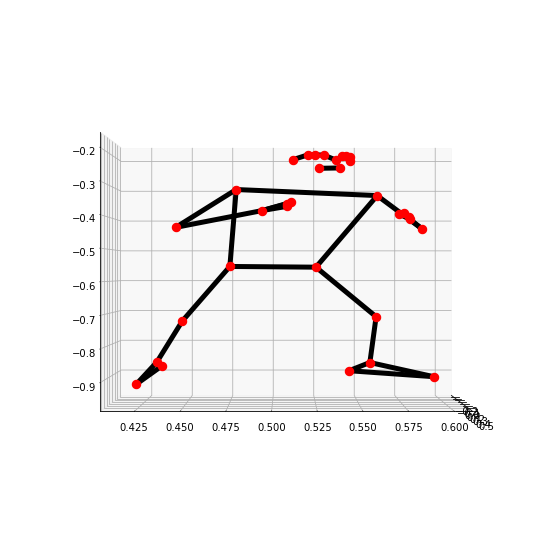

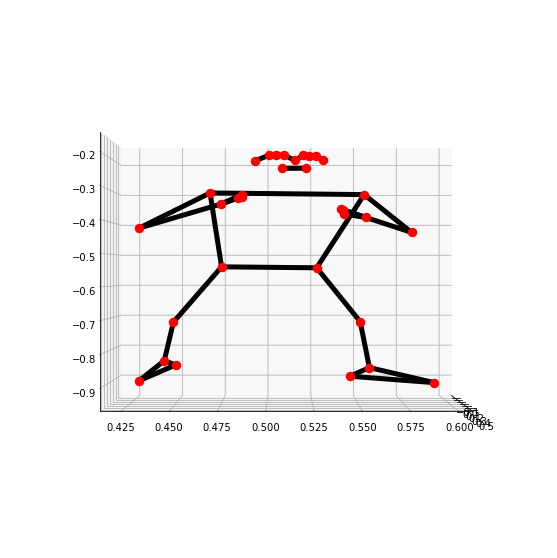

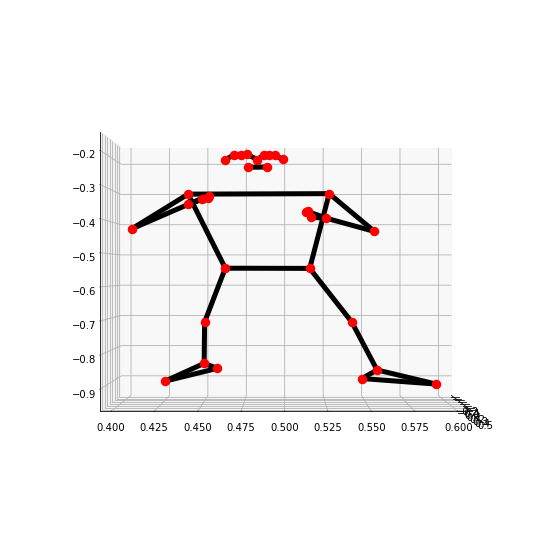

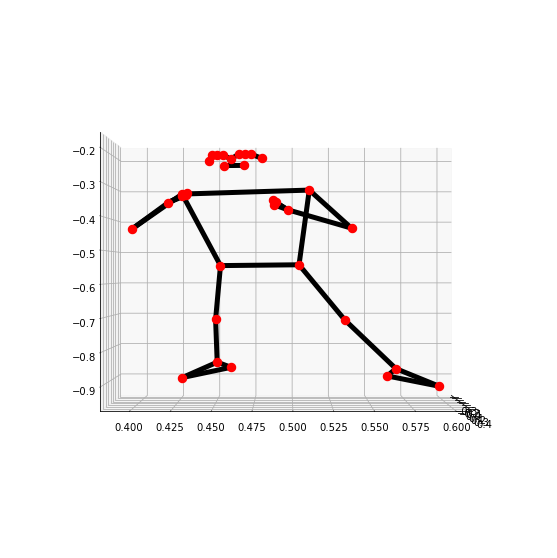

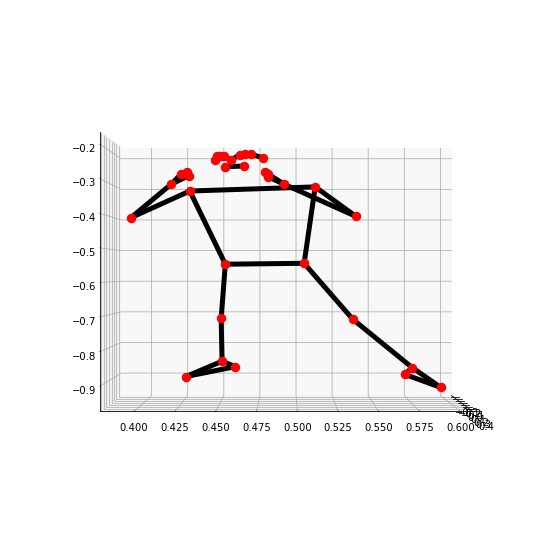

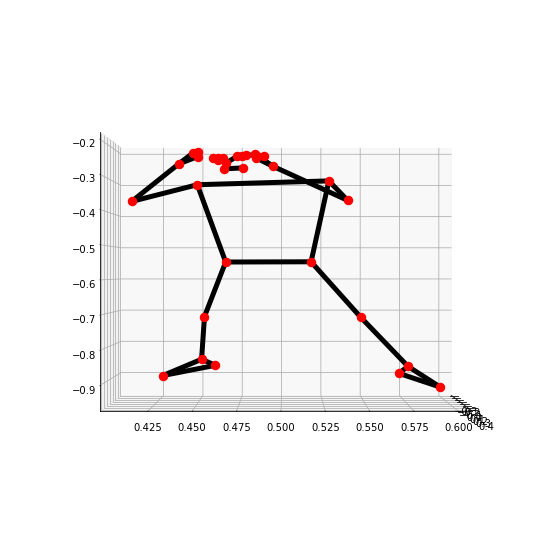

In [19]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 6

In [20]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../new/6/{}.MOV'.format(i), df[df['clip_name'] == '6_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [10, 22]
Current point: 1
Frame: 16, True angle: [86]
Current point: 2
Frame: 36, True angle: [92, 100, 83, 22]
Current point: 3
Frame: 40, True angle: [136, 118, 108]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [12, 23]
Current point: 1
Frame: 20, True angle: [36]
Current point: 2
Frame: 28, True angle: [75, 89, 79, 11]
Current point: 3
Frame: 44, True angle: [95, 112, 110]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [6, 20]
Current point: 1
Frame: 20, True angle: [40]
Current point: 2
Frame: 28, True angle: [81, 92, 78, 15]
Current point: 3
Frame: 44, True angle: [119, 121, 113]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [6, 19]
Current point: 1
Frame: 16, True angle: [48]
Current point: 2
Frame: 20, True angle: [124, 98, 54, 8]
Current point: 3
Frame: 36, True angle:

Current point: 3
Frame: 40, True angle: [104, 111, 111]
Current point: 4
total point: 4
--------------------------------------------
clip 32:
Frame: 4, True angle: [10, 24]
Current point: 1
Frame: 12, True angle: [65]
Current point: 2
Frame: 28, True angle: [108, 99, 50, 15]
Current point: 3
Frame: 36, True angle: [100, 108, 113]
Current point: 4
total point: 4
--------------------------------------------
clip 33:
Frame: 4, True angle: [9, 22]
Current point: 1
Frame: 12, True angle: [27]
Current point: 2
Frame: 24, True angle: [83, 86, 38, 13]
Current point: 3
Frame: 36, True angle: [108, 114, 116]
Current point: 4
total point: 4
--------------------------------------------
clip 34:
Frame: 4, True angle: [11, 24]
Current point: 1
Frame: 16, True angle: [22]
Current point: 2
Frame: 28, True angle: [80, 84, 29, 12]
Current point: 3
Frame: 44, True angle: [104, 107, 119]
Current point: 4
total point: 4
--------------------------------------------
clip 35:
Frame: 4, True angle: [9, 25]
Cur

## 7.มอญยันหลัก

In [21]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '12', 'true_angle': 75, 'operator': '>'},
{'step': 2, 'sub_step': 2, 'main_node': '14', 'true_angle': 130, 'operator': '>='},
{'step': 3, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'},
{'step': 3, 'sub_step': 2, 'main_node': '12', 'true_angle': 80, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'}])

cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 2, 'sub_step': 2, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'}])

### Test class

In [22]:
df = pd.read_csv('../video/train_csv/7.csv')
del df['Unnamed: 0']

In [32]:
clip_name = 9
m2 = MuayThai('../video/train_clip/7/{}.MOV'.format(clip_name), df[df['clip_name'] == '7_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [33]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [3, 15]
Current point: 1
Frame: 16, True angle: [109, 145]
Current point: 2
Frame: 28, True angle: [0, 45]
Current point: 3
Frame: 32, True angle: [1]
Current point: 4


4

In [34]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [35]:
landmarks = m2.get_landmarks()

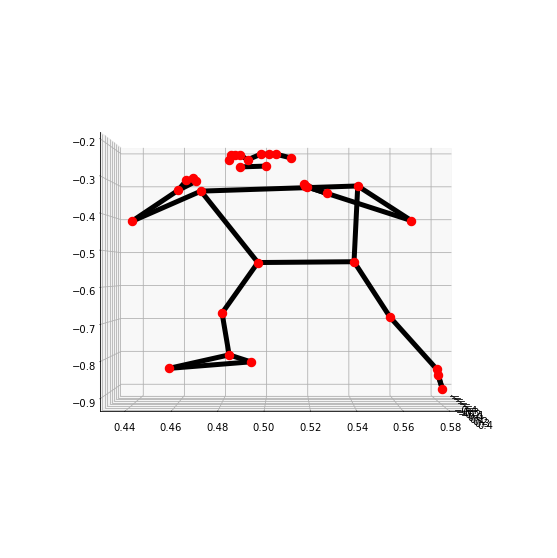

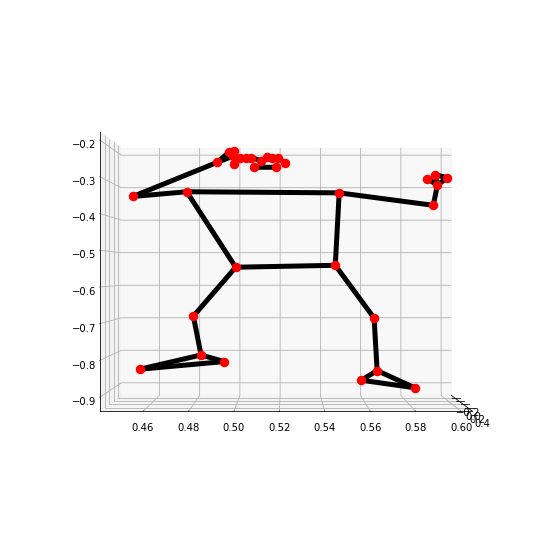

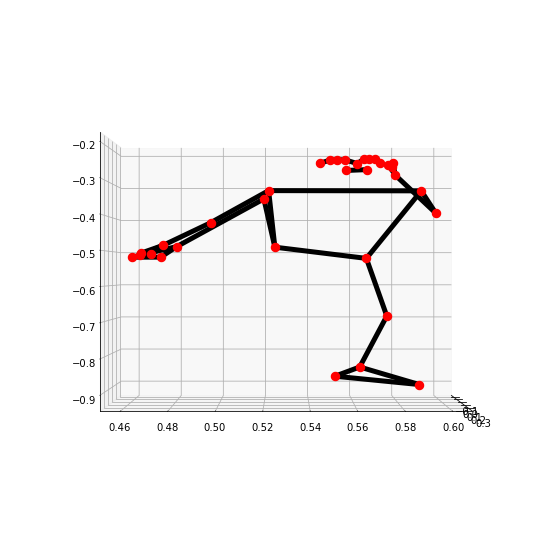

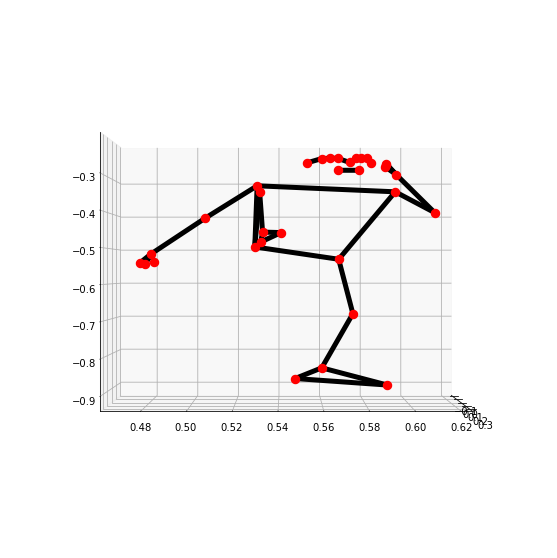

In [36]:
m2.show_true_graph(landmarks, true_step_frame_index)

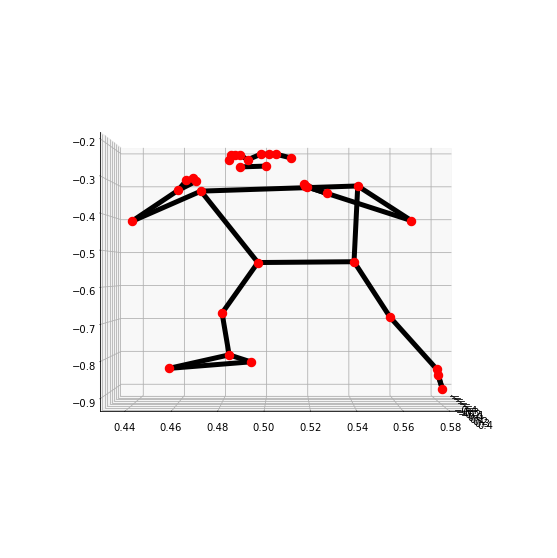

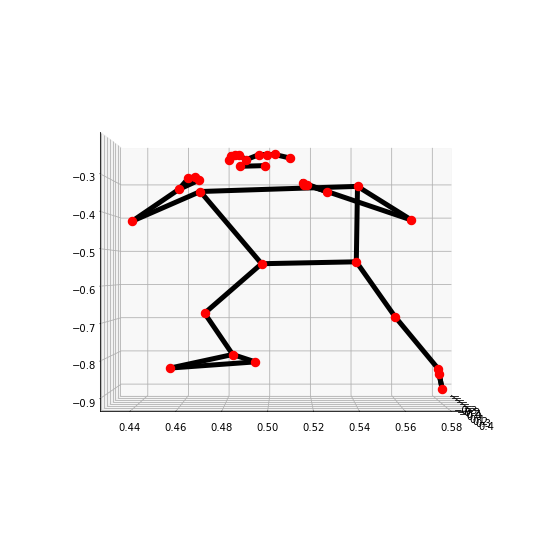

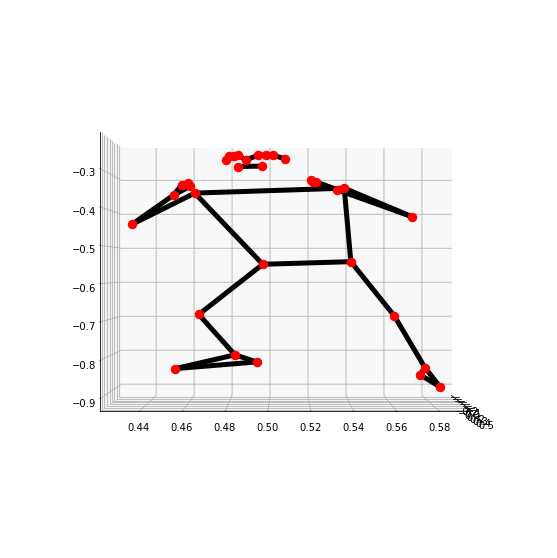

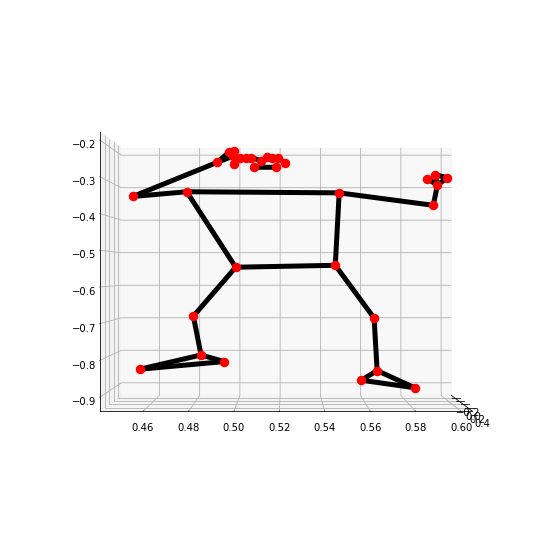

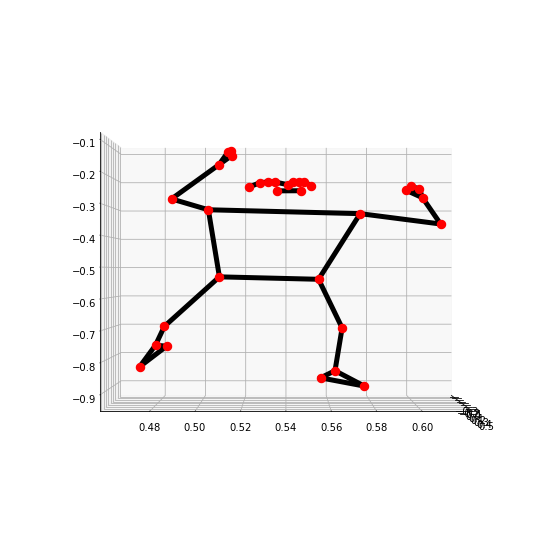

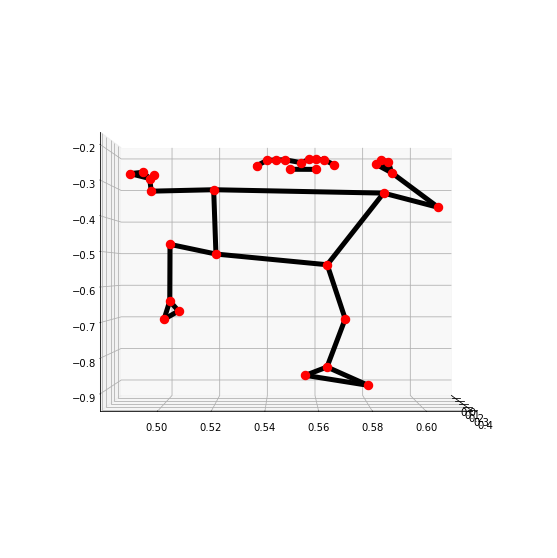

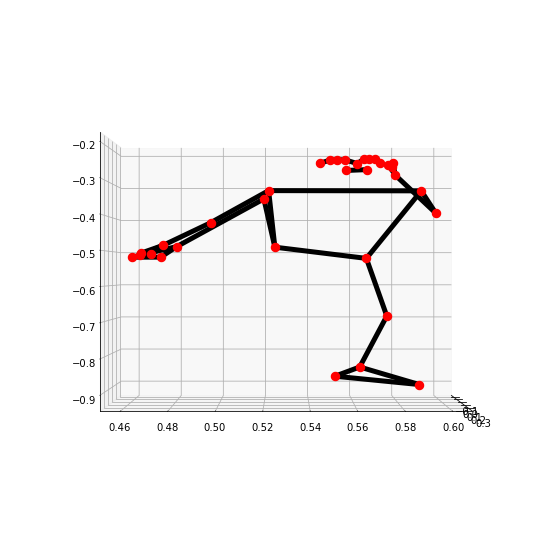

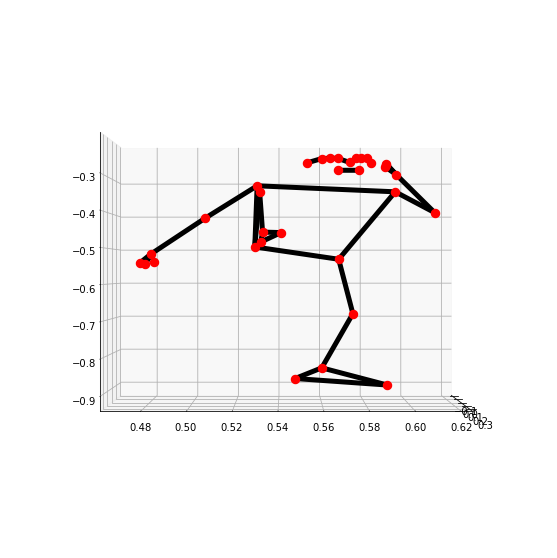

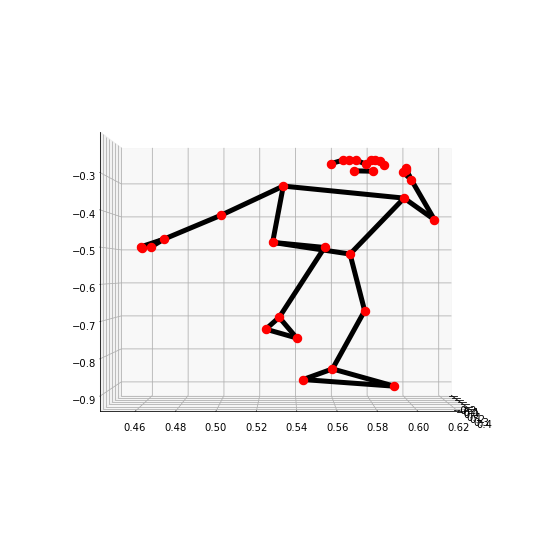

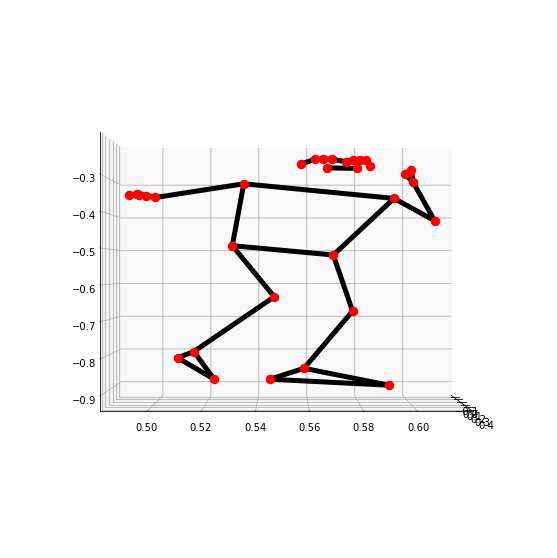

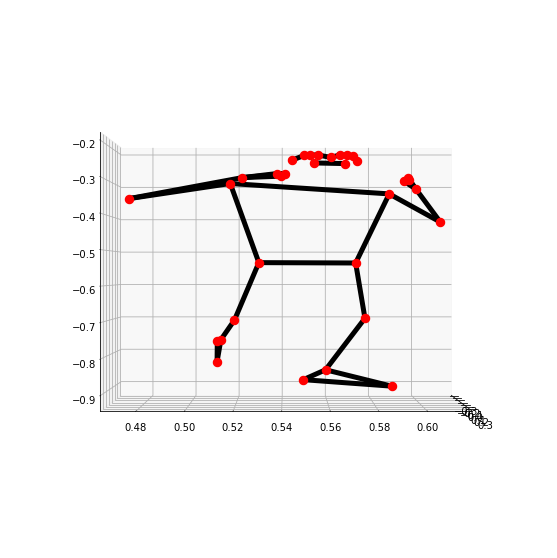

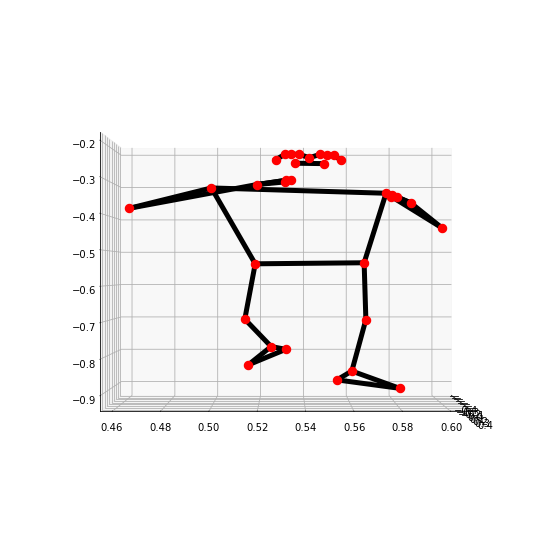

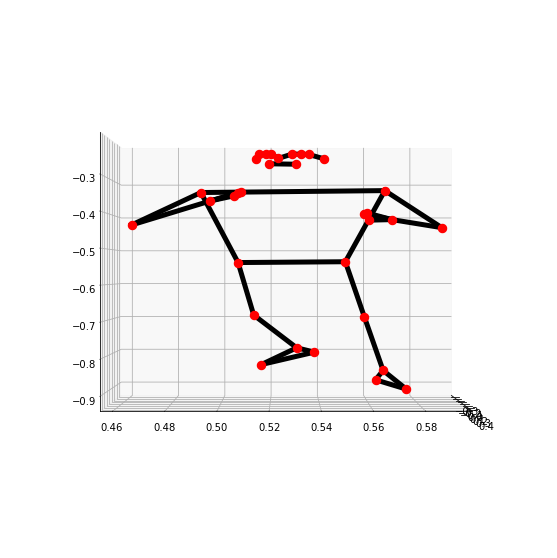

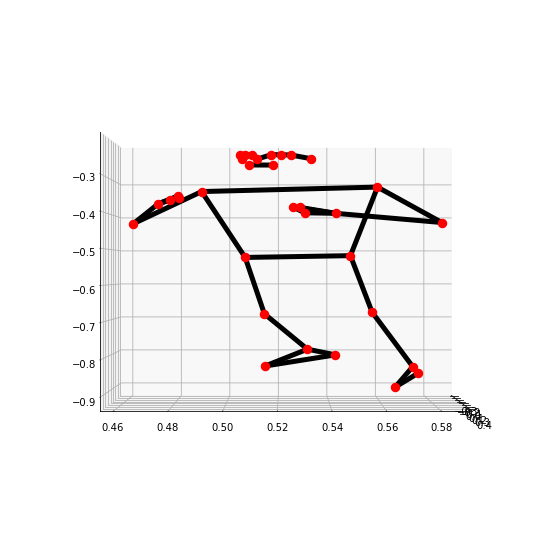

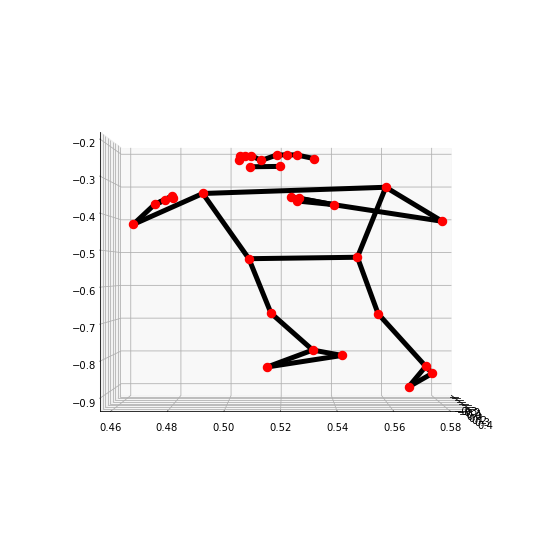

In [37]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 7

In [38]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../new/7/{}.MOV'.format(i), df[df['clip_name'] == '7_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [5, 18]
Current point: 1
Frame: 12, True angle: [102, 144]
Current point: 2
Frame: 20, True angle: [2, 60]
Current point: 3
Frame: 24, True angle: [1]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [10, 19]
Current point: 1
Frame: 12, True angle: [77, 133]
Current point: 2
Frame: 20, True angle: [1, 51]
Current point: 3
Frame: 24, True angle: [2]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [9, 14]
Current point: 1
Frame: 12, True angle: [108, 146]
Current point: 2
Frame: 20, True angle: [7, 74]
Current point: 3
Frame: 24, True angle: [12]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [13, 16]
Current point: 1
Frame: 12, True angle: [90, 136]
Current point: 2
Frame: 20, True angle: [3, 61]
Current point: 3
Frame: 24, True angle: [3]
Current point: 4
total point: 4
------------

Frame: 28, True angle: [4]
Current point: 4
total point: 4
--------------------------------------------
clip 35:
Frame: 4, True angle: [6, 16]
Current point: 1
Frame: 16, True angle: [92, 148]
Current point: 2
Frame: 20, True angle: [0, 2]
Current point: 3
Frame: 24, True angle: [0]
Current point: 4
total point: 4
--------------------------------------------


## 13.ดับชวาลา

In [72]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '11', 'true_angle': 30, 'operator': '>'},
{'step': 3, 'sub_step': 1, 'main_node': '26', 'true_angle': 160, 'operator': '<='},
{'step': 3, 'sub_step': 2, 'main_node': '11', 'true_angle': 27, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 2, 'main_node': '12', 'true_angle': 90, 'operator': '>'}])

cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'xy'},
{'step': 3, 'sub_step': 1, 'begin_node': '24', 'main_node': '26', 'end_node': '28' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'xy'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 4, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'}])

### Test class

In [73]:
df = pd.read_csv('../video/train_csv/13.csv')
del df['Unnamed: 0']

In [74]:
clip_name = 33
m2 = MuayThai('../video/train_clip/13/{}.MOV'.format(clip_name), df[df['clip_name'] == '13_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [75]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [11, 18]
Current point: 1
Frame: 16, True angle: [67]
Current point: 2
Frame: 28, True angle: [153, 14]
Current point: 3
Frame: 36, True angle: [93, 105]
Current point: 4


4

In [43]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [44]:
landmarks = m2.get_landmarks()

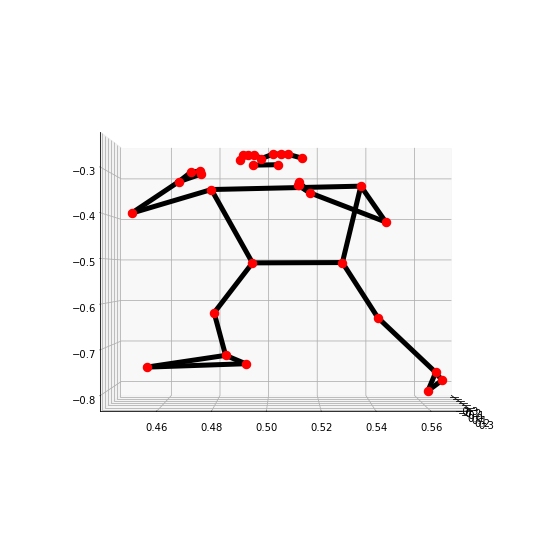

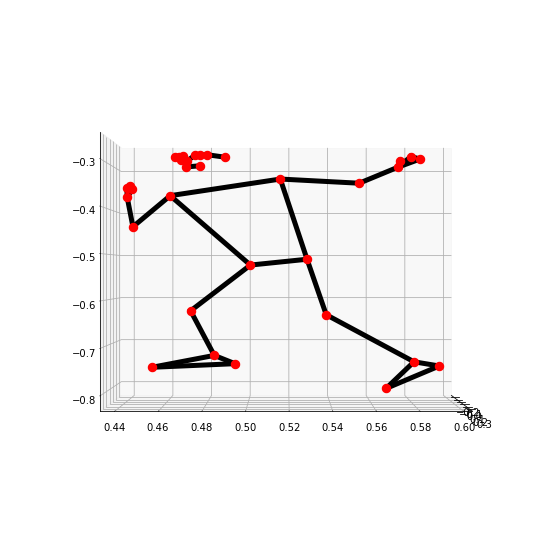

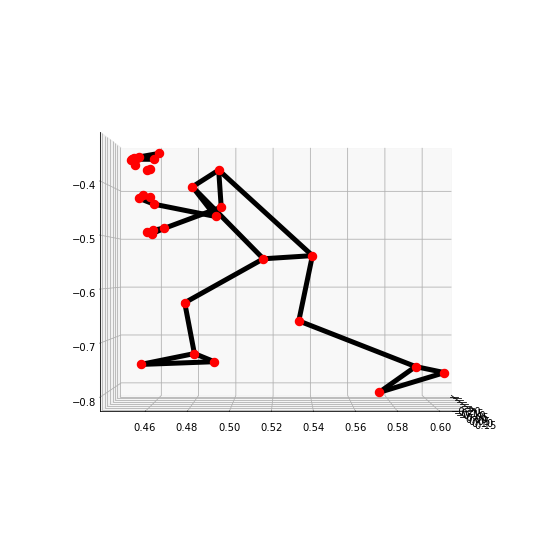

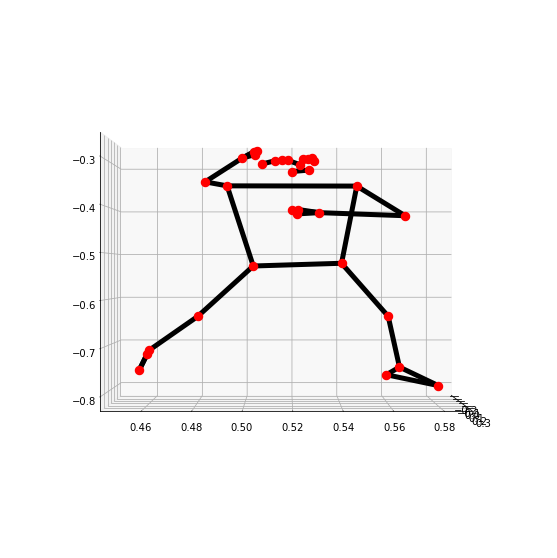

In [45]:
m2.show_true_graph(landmarks, true_step_frame_index)

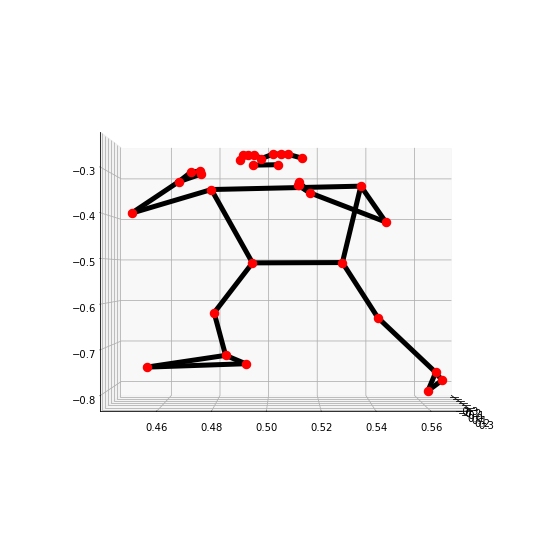

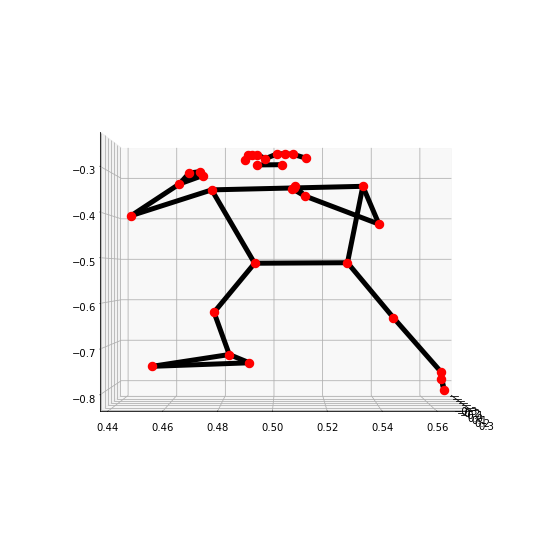

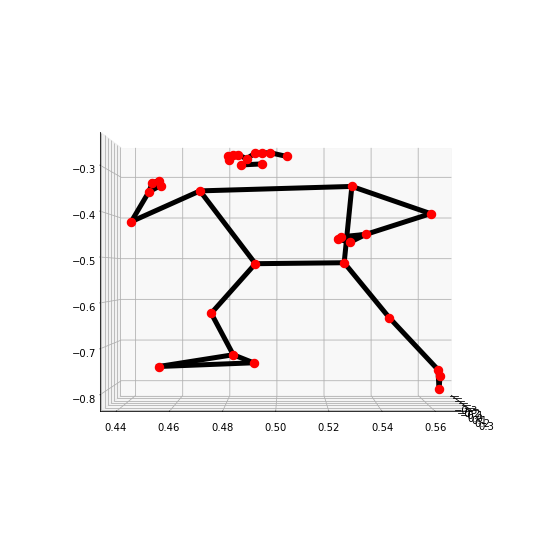

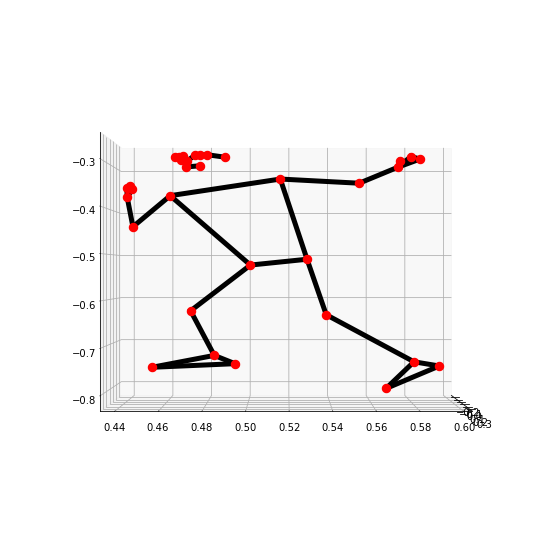

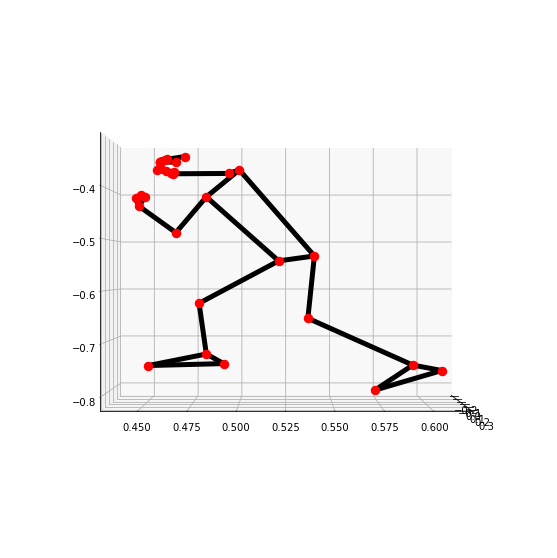

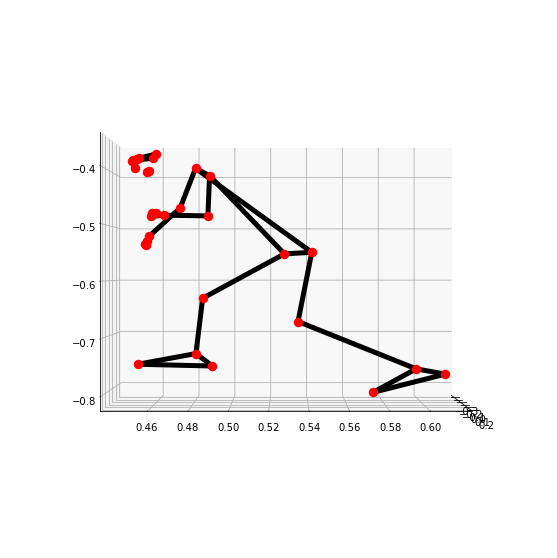

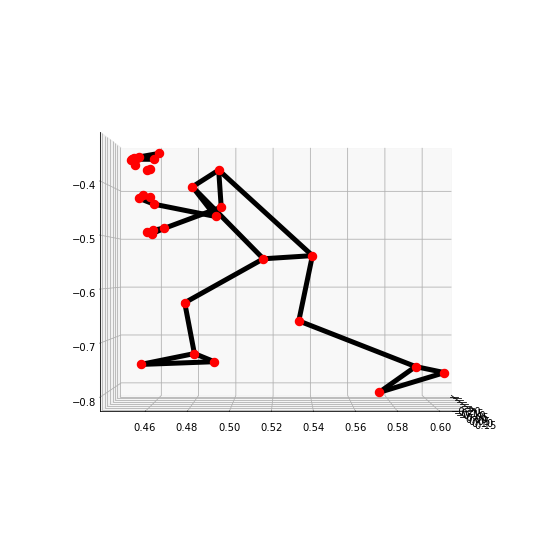

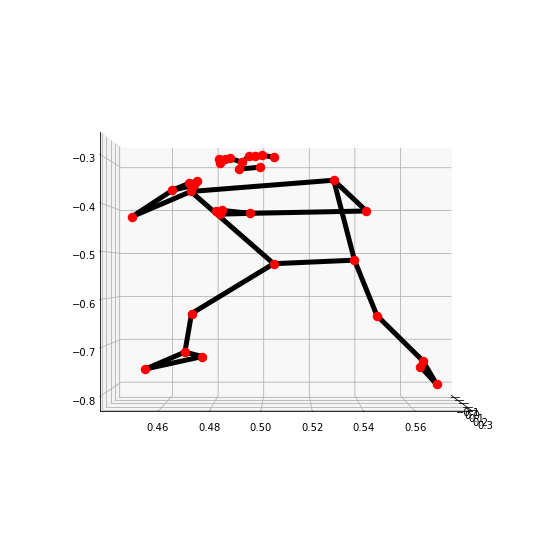

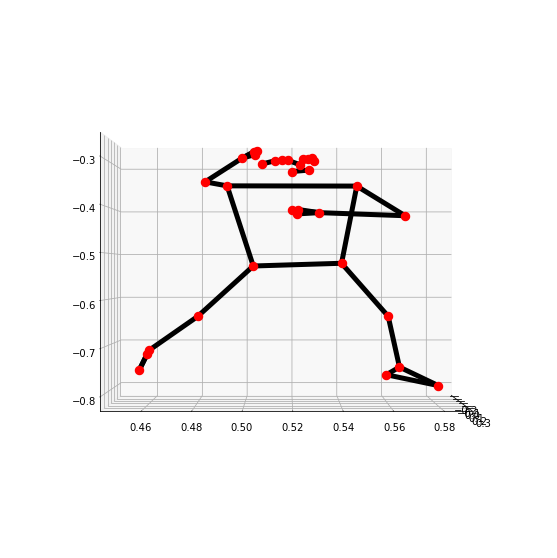

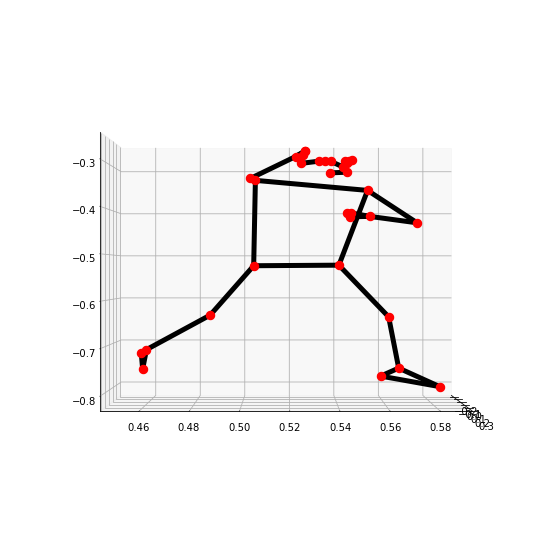

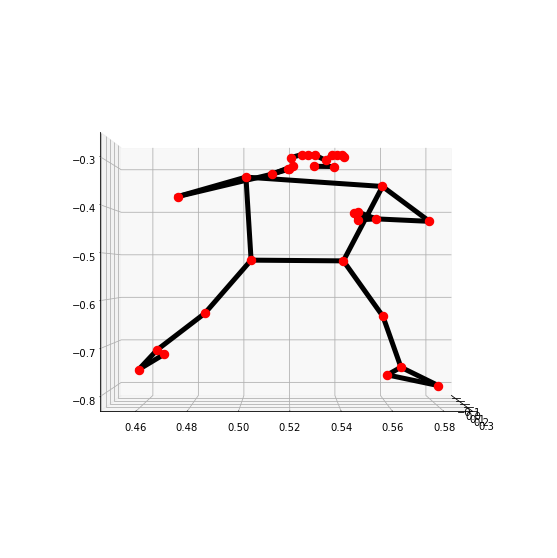

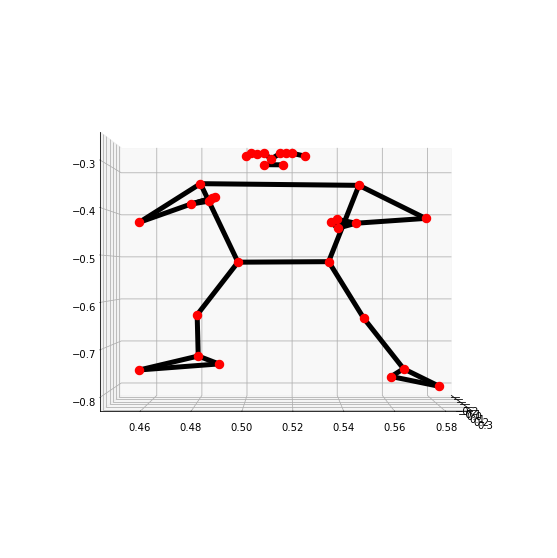

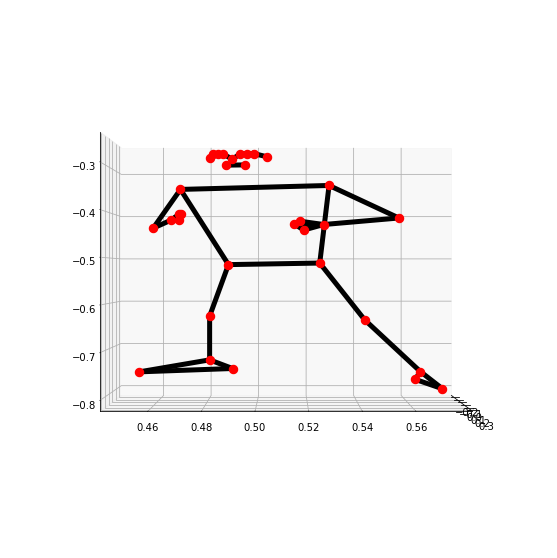

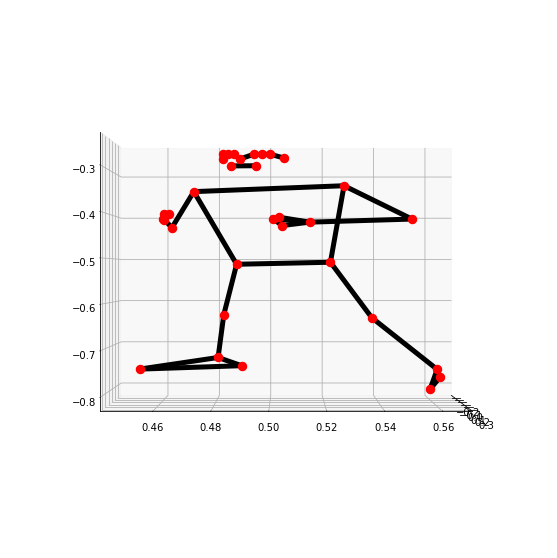

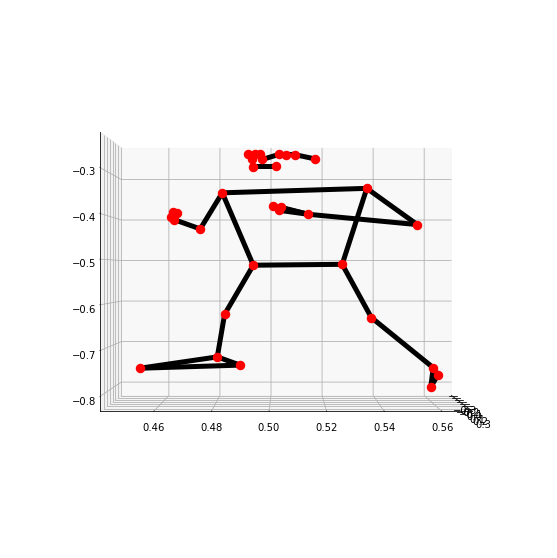

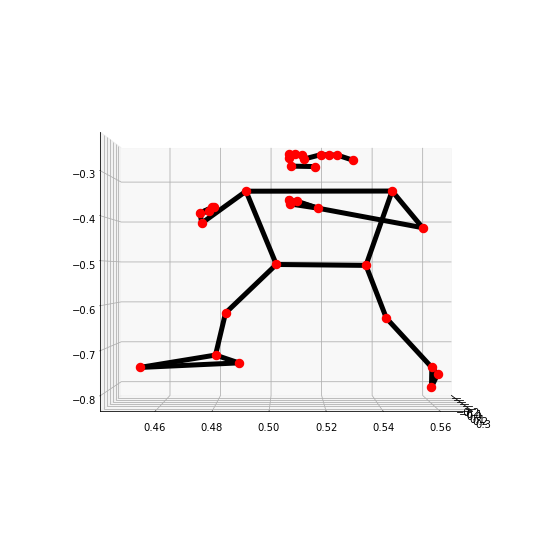

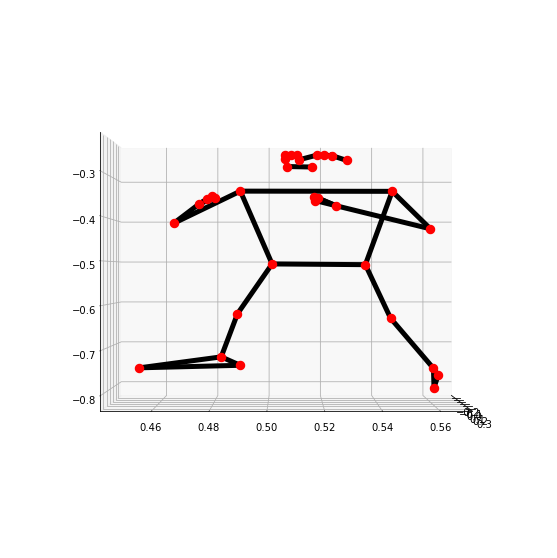

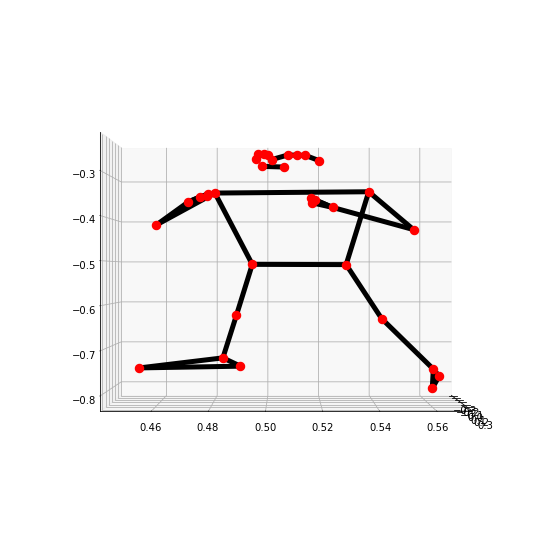

In [46]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 13

In [76]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../video/train_clip/13/{}.MOV'.format(i), df[df['clip_name'] == '13_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [5, 22]
Current point: 1
Frame: 20, True angle: [52]
Current point: 2
Frame: 32, True angle: [149, 17]
Current point: 3
Frame: 40, True angle: [179, 146]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [8, 22]
Current point: 1
Frame: 12, True angle: [32]
Current point: 2
Frame: 24, True angle: [154, 26]
Current point: 3
Frame: 32, True angle: [176, 143]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [2, 20]
Current point: 1
Frame: 16, True angle: [108]
Current point: 2
Frame: 24, True angle: [156, 22]
Current point: 3
Frame: 36, True angle: [177, 124]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [10, 24]
Current point: 1
Frame: 12, True angle: [72]
Current point: 2
Frame: 20, True angle: [159, 24]
Current point: 3
Frame: 36, True angle: [179, 121]
Current point: 4
total point: 4

Frame: 4, True angle: [11, 18]
Current point: 1
Frame: 16, True angle: [67]
Current point: 2
Frame: 28, True angle: [153, 14]
Current point: 3
Frame: 36, True angle: [93, 105]
Current point: 4
total point: 4
--------------------------------------------
clip 34:
Frame: 4, True angle: [8, 13]
Current point: 1
Frame: 16, True angle: [75]
Current point: 2
Frame: 24, True angle: [157, 16]
Current point: 3
Frame: 36, True angle: [173, 113]
Current point: 4
total point: 4
--------------------------------------------
clip 35:
Frame: 4, True angle: [12, 22]
Current point: 1
Frame: 12, True angle: [80]
Current point: 2
Frame: 20, True angle: [152, 26]
Current point: 3
Frame: 36, True angle: [176, 118]
Current point: 4
total point: 4
--------------------------------------------


## 15. หักคอเอราวัณ

In [48]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '>'},
{'step': 2, 'sub_step': 2, 'main_node': '12', 'true_angle': 90, 'operator': '>'},
{'step': 2, 'sub_step': 3, 'main_node': '23', 'true_angle': 90, 'operator': '<'},
{'step': 3, 'sub_step': 1, 'main_node': '11', 'true_angle': 90, 'operator': '>'},
{'step': 3, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 2, 'main_node': '26', 'true_angle': 100, 'operator': '<='},
{'step': 4, 'sub_step': 3, 'main_node': '12', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 4, 'main_node': '11', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 5, 'main_node': '14', 'true_angle': 100, 'operator': '<'},
{'step': 4, 'sub_step': 6, 'main_node': '13', 'true_angle': 90, 'operator': '<'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'yz'},
{'step': 2, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 2, 'sub_step': 3, 'begin_node': '24', 'main_node': '23', 'end_node': '25' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'yz'},
{'step': 3, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'yz'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},
{'step': 4, 'sub_step': 2, 'begin_node': '24', 'main_node': '26', 'end_node': '28' , 'axis': 'yz'},
{'step': 4, 'sub_step': 3, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'xy'},
{'step': 4, 'sub_step': 4, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'xy'},
{'step': 4, 'sub_step': 5, 'begin_node': '12', 'main_node': '14', 'end_node': '22' , 'axis': 'xy'},
{'step': 4, 'sub_step': 6, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'}])

### Test class

In [49]:
df = pd.read_csv('../video/train_csv/15.csv')
del df['Unnamed: 0']

In [50]:
clip_name = 12
m2 = MuayThai('../video/train_clip/15/{}.MOV'.format(clip_name), df[df['clip_name'] == '15_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [51]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [3, 10]
Current point: 1
Frame: 32, True angle: [159, 126, 41]
Current point: 2
Frame: 36, True angle: [123, 154]
Current point: 3
Frame: 48, True angle: [4, 74, 24, 8, 14, 62]
Current point: 4


4

In [52]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [53]:
landmarks = m2.get_landmarks()

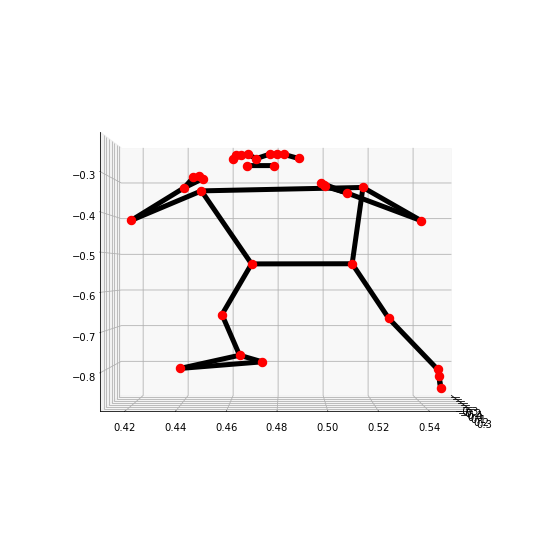

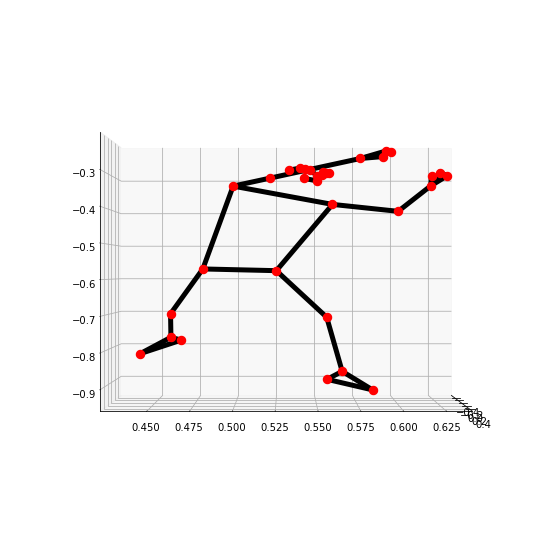

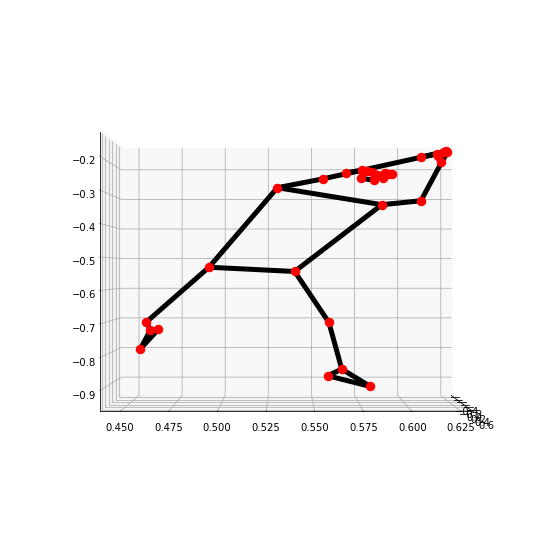

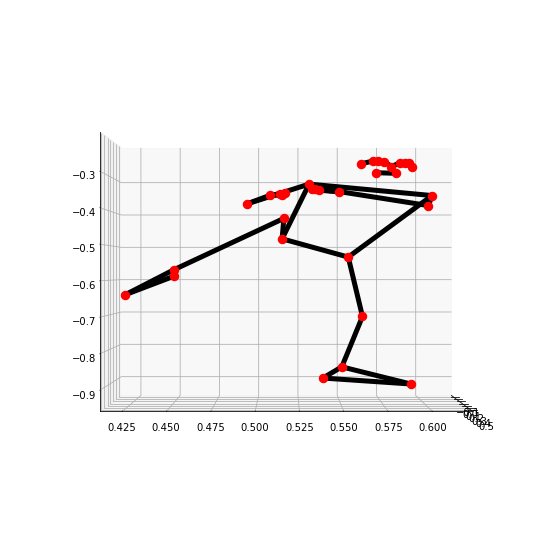

In [54]:
m2.show_true_graph(landmarks, true_step_frame_index)

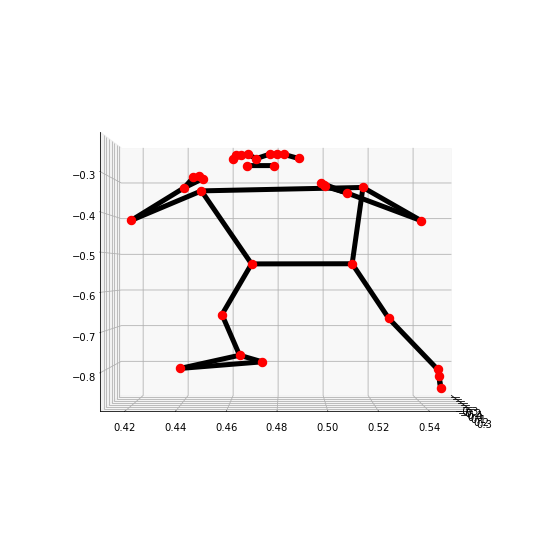

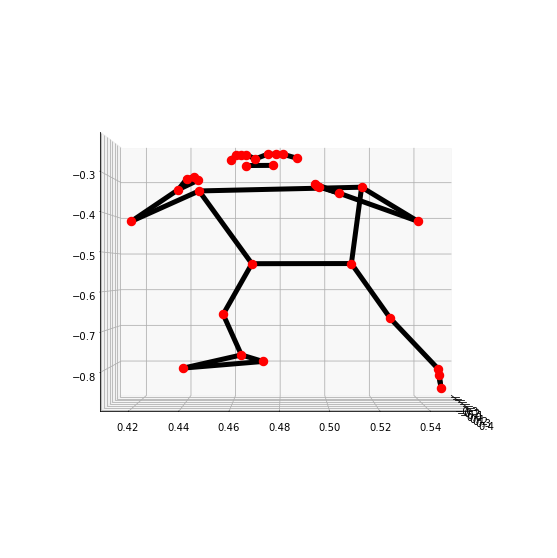

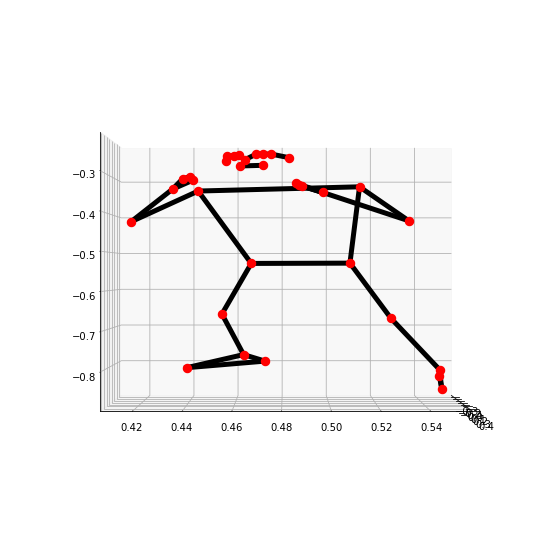

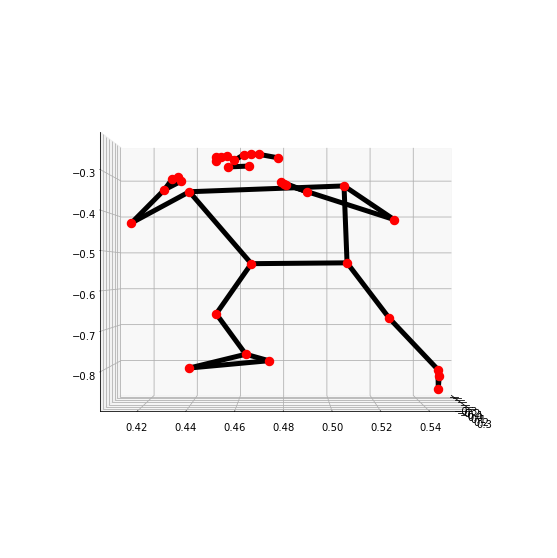

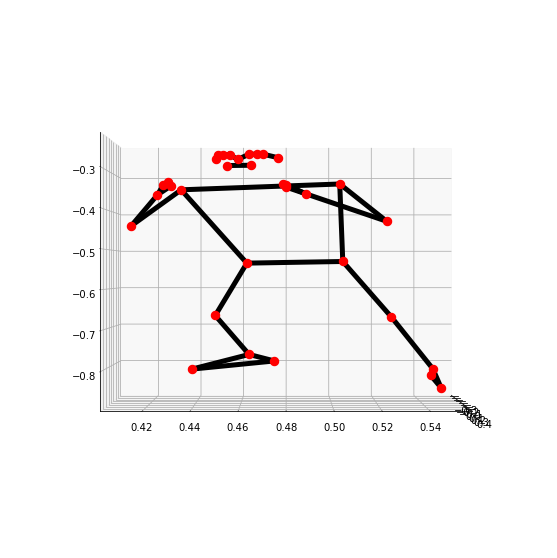

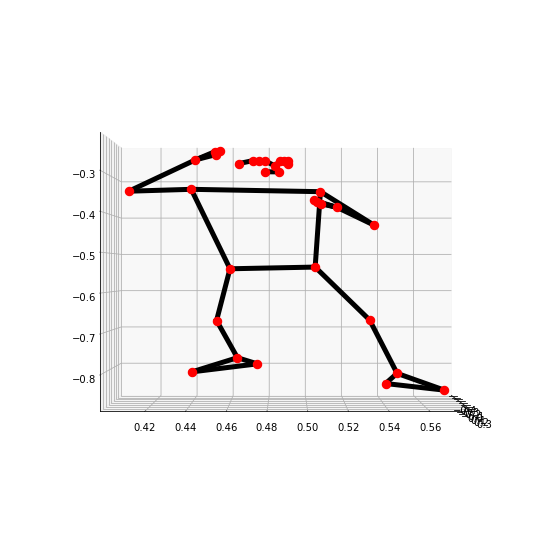

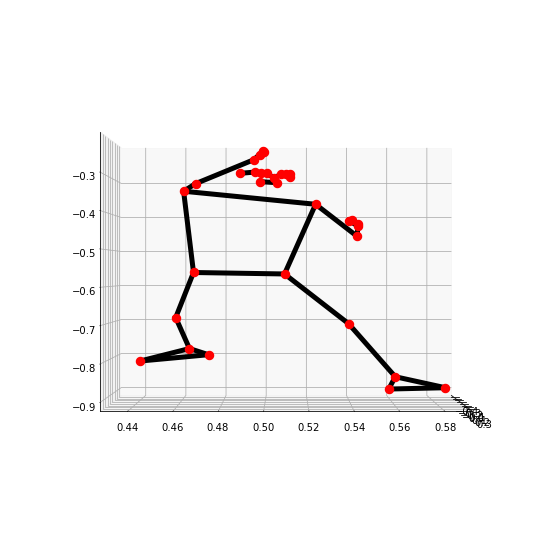

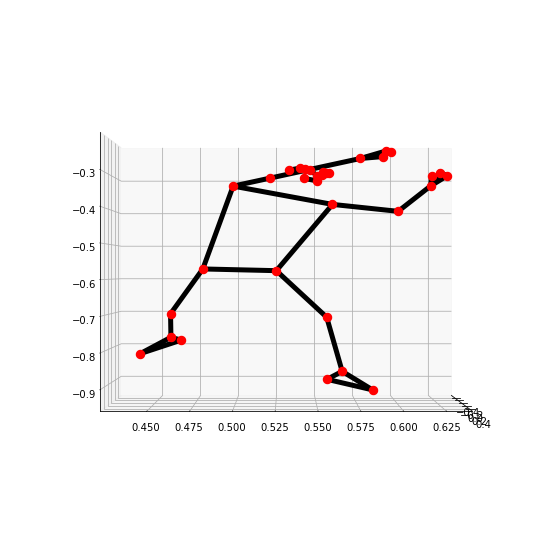

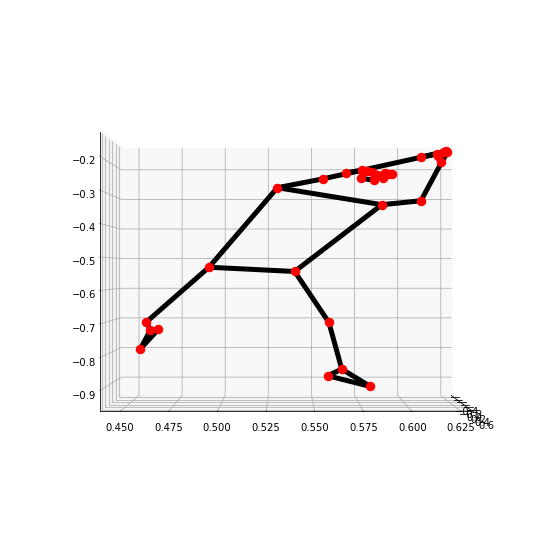

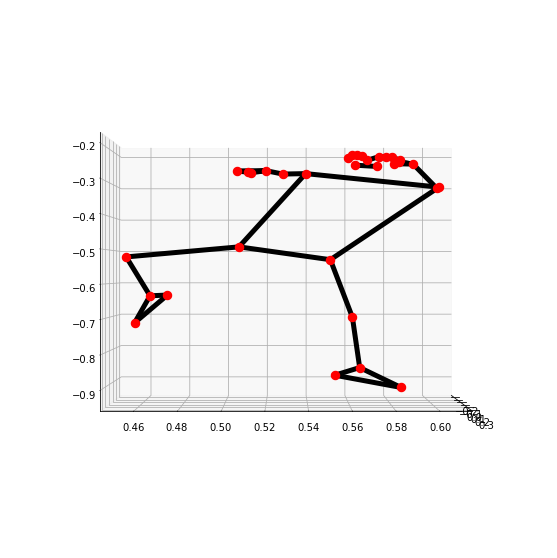

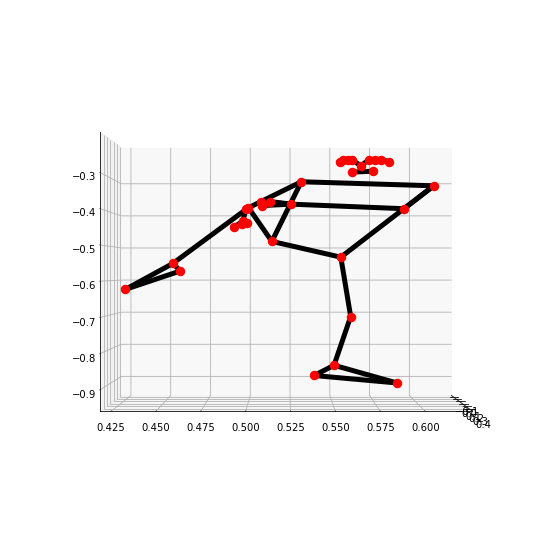

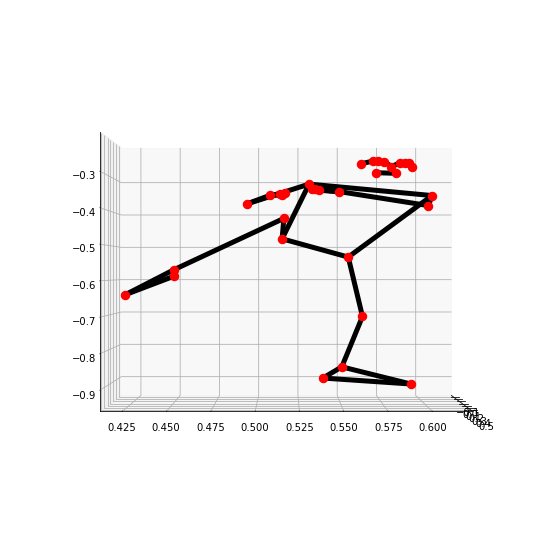

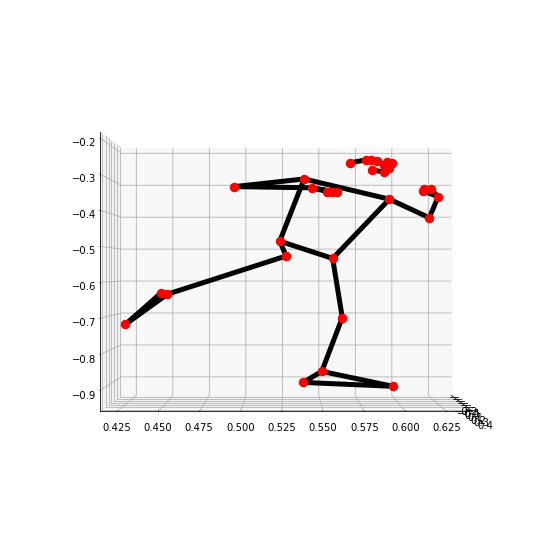

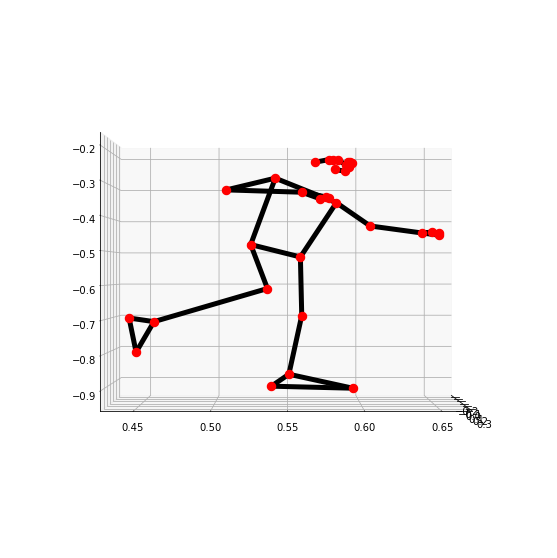

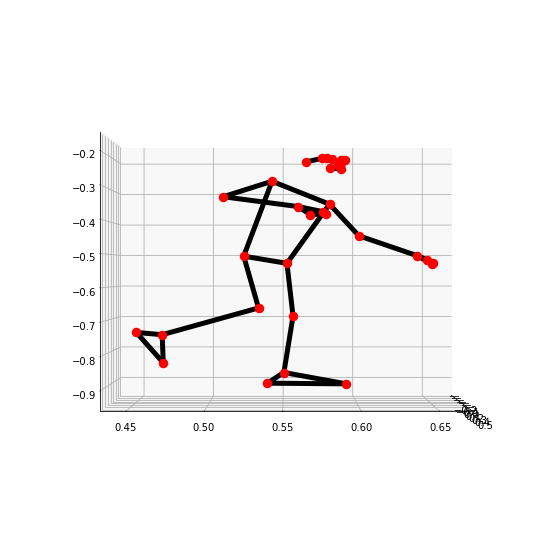

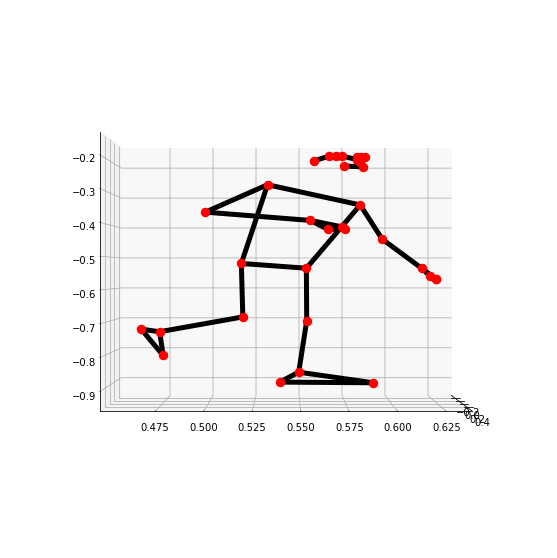

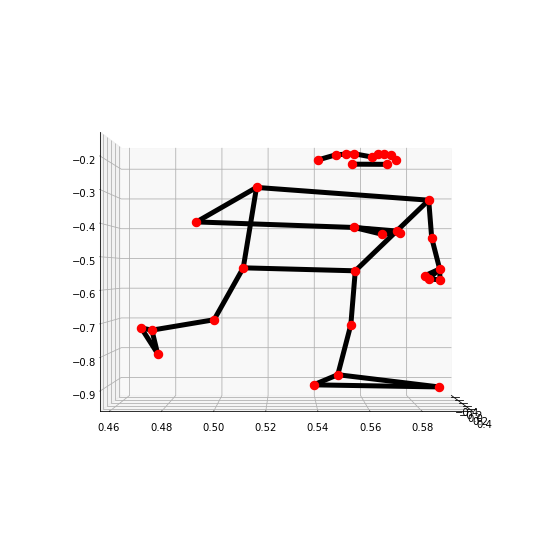

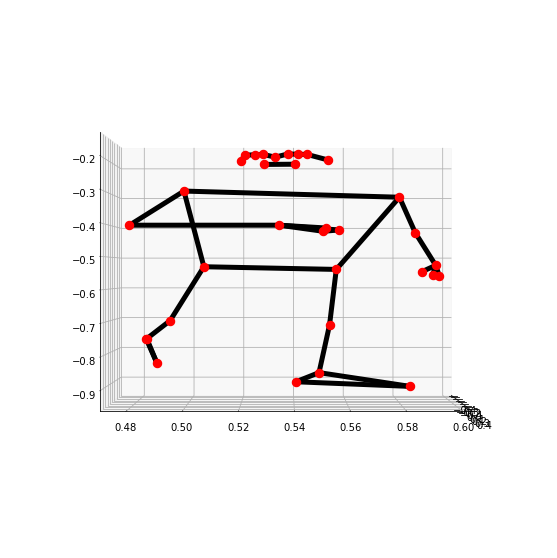

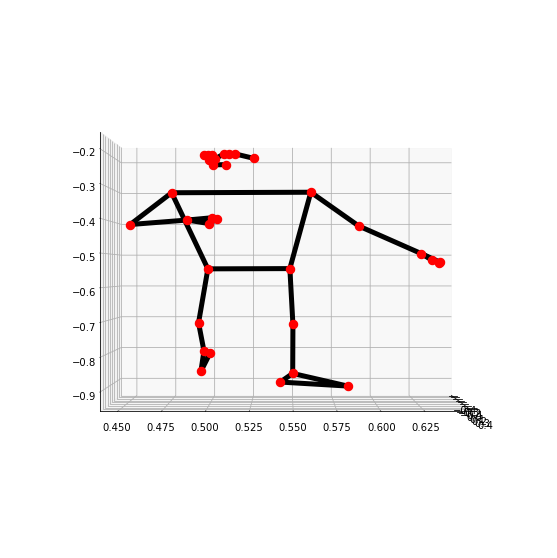

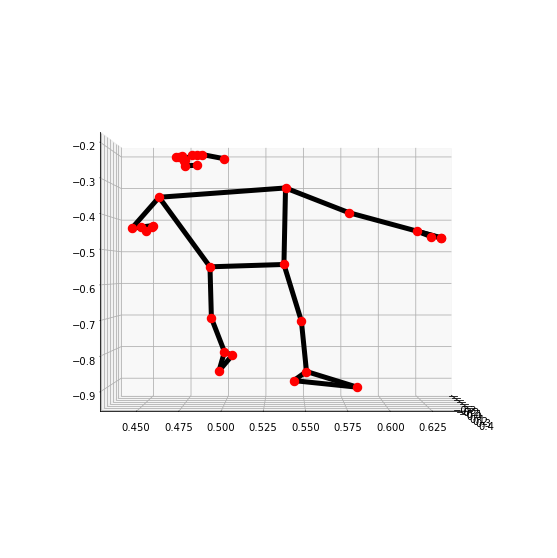

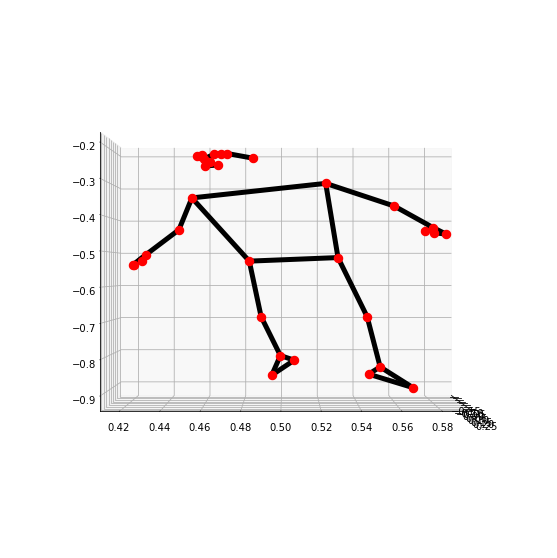

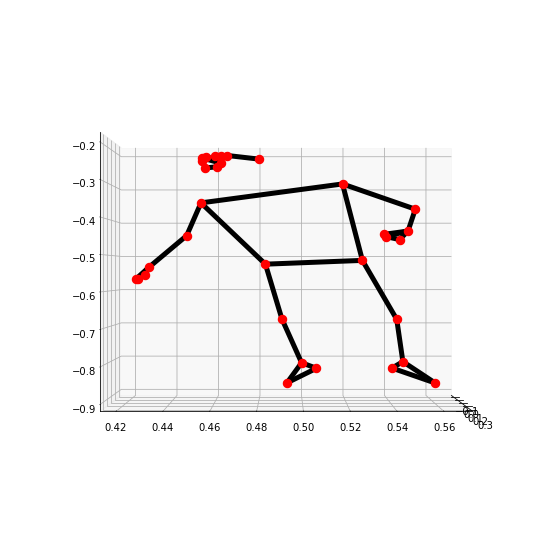

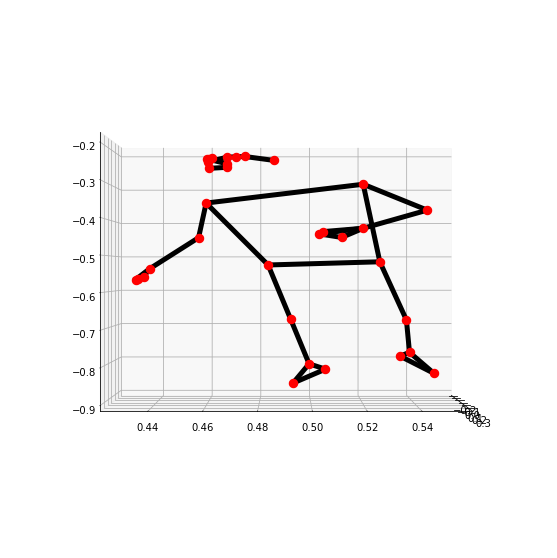

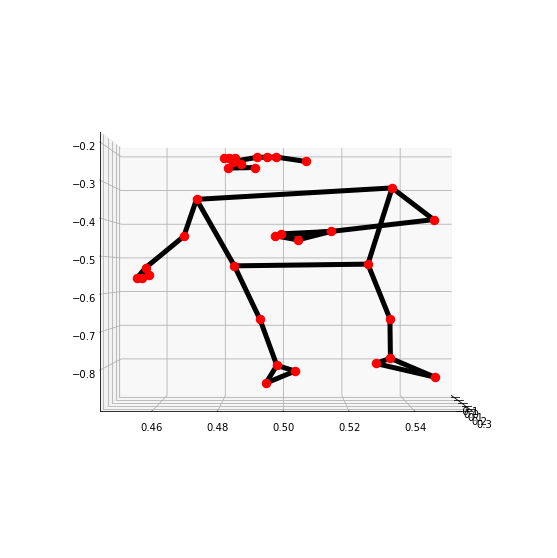

In [55]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 15

In [56]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../video/train_clip/15/{}.MOV'.format(i), df[df['clip_name'] == '15_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [7, 11]
Current point: 1
Frame: 20, True angle: [149, 123, 41]
Current point: 2
Frame: 28, True angle: [106, 154]
Current point: 3
Frame: 36, True angle: [24, 71, 18, 9, 82, 15]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [3, 12]
Current point: 1
Frame: 24, True angle: [161, 109, 47]
Current point: 2
Frame: 28, True angle: [95, 155]
Current point: 3
Frame: 40, True angle: [5, 72, 24, 14, 55, 49]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [4, 15]
Current point: 1
Frame: 20, True angle: [107, 131, 70]
Current point: 2
Frame: 24, True angle: [93, 151]
Current point: 3
Frame: 36, True angle: [12, 63, 13, 9, 89, 47]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [3, 15]
Current point: 1
Frame: 20, True angle: [141, 99, 6]
Current point: 2
Frame: 28, True angle: [91, 148]
Curren

Frame: 28, True angle: [108, 158]
Current point: 3
Frame: 36, True angle: [7, 65, 14, 15, 71, 78]
Current point: 4
total point: 4
--------------------------------------------
clip 31:
Frame: 4, True angle: [4, 17]
Current point: 1
Frame: 16, True angle: [158, 112, 87]
Current point: 2
Frame: 24, True angle: [102, 154]
Current point: 3
Frame: 32, True angle: [1, 71, 0, 10, 73, 68]
Current point: 4
total point: 4
--------------------------------------------
clip 32:
Frame: 4, True angle: [5, 19]
Current point: 1
Frame: 16, True angle: [147, 126, 70]
Current point: 2
Frame: 20, True angle: [111, 158]
Current point: 3
Frame: 32, True angle: [16, 78, 17, 17, 74, 58]
Current point: 4
total point: 4
--------------------------------------------
clip 33:
Frame: 4, True angle: [3, 12]
Current point: 1
Frame: 20, True angle: [147, 130, 61]
Current point: 2
Frame: 28, True angle: [109, 158]
Current point: 3
Frame: 44, True angle: [13, 53, 17, 15, 71, 63]
Current point: 4
total point: 4
-----------

## Test system part 2

In [198]:
muay_thai_pose = 6
df = pd.read_csv('../video/train_csv/{}.csv'.format(muay_thai_pose))
del df['Unnamed: 0']

In [199]:
test_df = pd.read_csv('../video/test_csv/test.csv')

In [200]:
body_nodes = {11: 'left_shoulder', 12: 'right_shoulder', 
                  13: 'left_elbow', 14: 'right_elbow', 
                  15: 'left_wrist', 16: 'right_wrist', 
                  23: 'left_hip', 24: 'right_hip', 
                  25: 'left_knee', 26: 'right_knee', 
                  27: 'left_ankle', 28: 'right_ankle'}

#total_distance = 0

print('===============================================')
for i in range(1, 36):
    print('clip {}'.format(i))
    total_distance = 0
    for key in body_nodes.keys():
        dtw_train = np.array(df[df['clip_name'] == '{}_{}'.format(muay_thai_pose, i)][['{}_x'.format(key), '{}_y'.format(key), '{}_z'.format(key)]])
        dtw_test = np.array(test_df[['{}_x'.format(key), '{}_y'.format(key), '{}_z'.format(key)]])
        distance, path = fastdtw(dtw_train, dtw_test, dist=euclidean)

        print('Distance of {} is {}.'.format(body_nodes[key], distance))
        total_distance += distance

    print('Avg. of distance of clip {} is {}.'.format(i, total_distance/12))
    print('===============================================')

clip 1
Distance of left_shoulder is 2.87854684278744.
Distance of right_shoulder is 3.5605438726882013.
Distance of left_elbow is 3.0044830011995725.
Distance of right_elbow is 3.466458052223711.
Distance of left_wrist is 3.8903382590944786.
Distance of right_wrist is 2.9748628676528055.
Distance of left_hip is 1.718017676545824.
Distance of right_hip is 1.8278489784388783.
Distance of left_knee is 1.0596393143058465.
Distance of right_knee is 3.3204000191675447.
Distance of left_ankle is 2.5674049514281.
Distance of right_ankle is 4.653874200521732.
Avg. of distance of clip 1 is 2.910201503004511.
clip 2
Distance of left_shoulder is 2.9899066849734117.
Distance of right_shoulder is 3.629530189746779.
Distance of left_elbow is 3.2862815054054333.
Distance of right_elbow is 3.6483717710816688.
Distance of left_wrist is 4.185185770266271.
Distance of right_wrist is 3.195858582488377.
Distance of left_hip is 1.7354836421464837.
Distance of right_hip is 1.813823550189096.
Distance of left_

Distance of right_knee is 3.433849452783531.
Distance of left_ankle is 3.080269751184976.
Distance of right_ankle is 3.979141057943305.
Avg. of distance of clip 15 is 3.3108314339625444.
clip 16
Distance of left_shoulder is 3.029700752911674.
Distance of right_shoulder is 3.4802905042148367.
Distance of left_elbow is 3.0539386861315028.
Distance of right_elbow is 3.5303694305064828.
Distance of left_wrist is 3.7068240034923727.
Distance of right_wrist is 3.1863144451572545.
Distance of left_hip is 1.9736101836474087.
Distance of right_hip is 2.155089346766467.
Distance of left_knee is 1.48977163789978.
Distance of right_knee is 3.559937058075855.
Distance of left_ankle is 2.873298376550697.
Distance of right_ankle is 4.141184752943619.
Avg. of distance of clip 16 is 3.0150274315248295.
clip 17
Distance of left_shoulder is 2.913102744703932.
Distance of right_shoulder is 3.3801188474416803.
Distance of left_elbow is 3.140008592217566.
Distance of right_elbow is 3.4226856288617773.
Dista

Distance of left_elbow is 3.244602265291236.
Distance of right_elbow is 3.7686063899885407.
Distance of left_wrist is 3.9522926504207643.
Distance of right_wrist is 3.8415849823834662.
Distance of left_hip is 2.1242312277855855.
Distance of right_hip is 2.304427251846105.
Distance of left_knee is 1.8380183488549453.
Distance of right_knee is 3.7698668167819305.
Distance of left_ankle is 3.183741489500784.
Distance of right_ankle is 4.046015302030103.
Avg. of distance of clip 28 is 3.237151139478815.
clip 29
Distance of left_shoulder is 2.821437396356119.
Distance of right_shoulder is 3.690720597571704.
Distance of left_elbow is 3.3558167993062717.
Distance of right_elbow is 3.9253713695494135.
Distance of left_wrist is 4.34327120614788.
Distance of right_wrist is 3.798098592274702.
Distance of left_hip is 1.9895276705784581.
Distance of right_hip is 2.197985344274419.
Distance of left_knee is 1.8641878280231297.
Distance of right_knee is 3.589776065297144.
Distance of left_ankle is 3.2